## Plotting

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns

np.__version__, pd.__version__, sns.__version__

('1.19.5', '1.2.4', '0.11.1')

In [3]:
names = ['alice', 'bob', 'marc', 'bill', 'julie']
age = pd.Series([12, 13, 16, 11, 16], index=names)
height = pd.Series([130, 140, 176, 120, 165], index=names)
sex = pd.Series(list('fmmmf'), index=names)
p = pd.DataFrame({'age':age, 'height':height, 'sex':sex})
p

age  height sex
alice   12     130   f
bob     13     140   m
marc    16     176   m
bill    11     120   m
julie   16     165   f

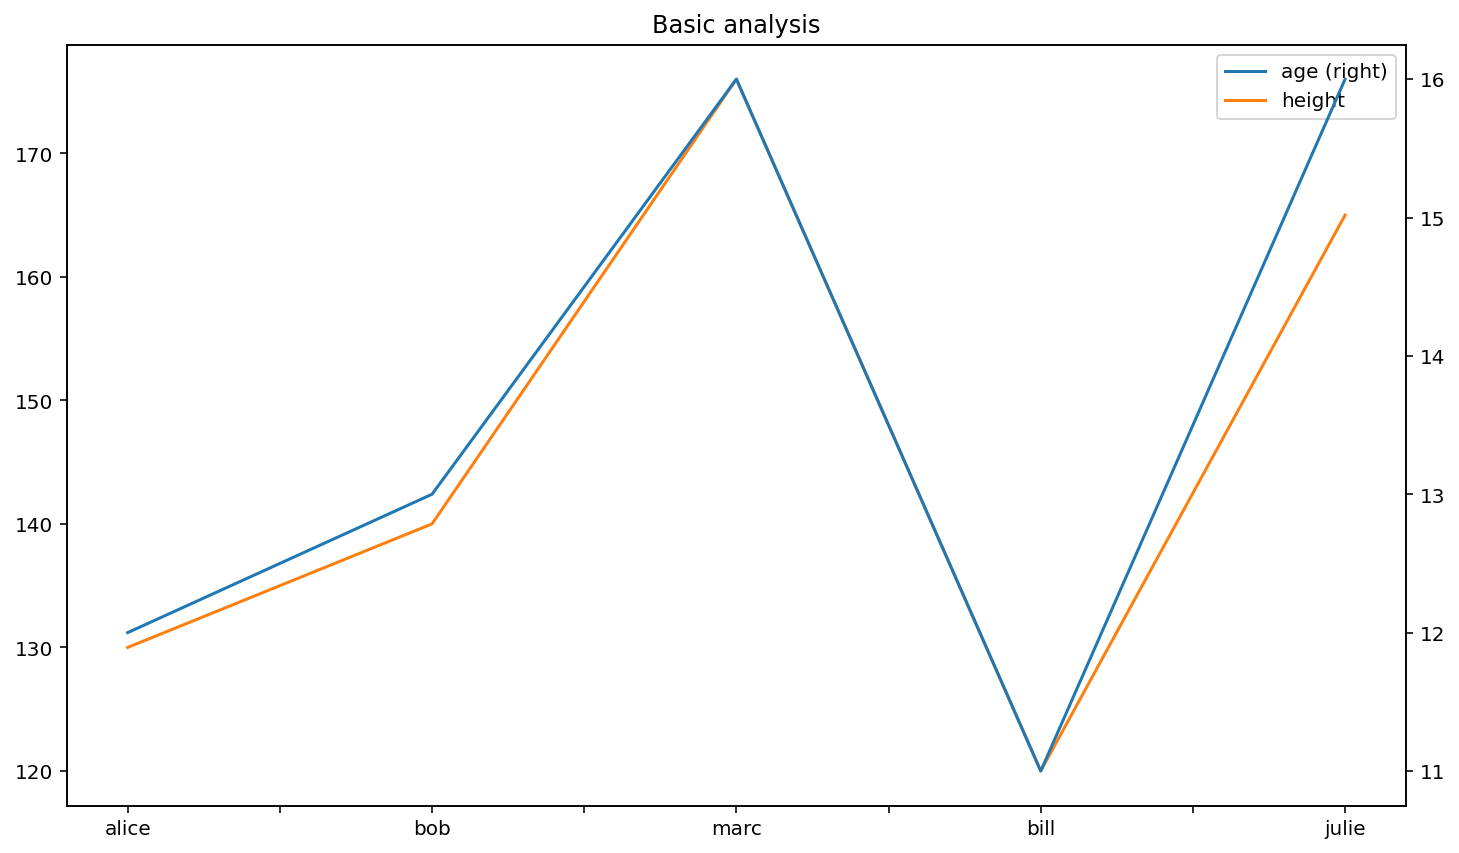

In [4]:
import matplotlib.pyplot as plt
# use a secondary y-axis for age
p.loc[:,['age', 'height']].plot(secondary_y=['age'])
plt.title('Basic analysis')
plt.savefig('basic.png')
plt.show()

In [0]:
## Seaborn
### Tidy data
- https://www.jstatsoft.org/article/view/v059i10

In [9]:
# repartition of eye color per country (fake data forged by me)
eye_color = pd.DataFrame({'country': pd.Series(
['fr', 'it', 'es']),
'blue': pd.Series([20, 15, 10]),
'brown': pd.Series([50, 25, 40]),
'black': pd.Series([30, 60, 50])})
eye_color

country  blue  brown  black
0      fr    20     50     30
1      it    15     25     60
2      es    10     40     50

In [10]:
# columns are melted
eye_color_melt = eye_color.melt(id_vars='country', var_name='color', value_name='percentage')
eye_color_melt

country  color  percentage
0      fr   blue          20
1      it   blue          15
2      es   blue          10
3      fr  brown          50
4      it  brown          25
5      es  brown          40
6      fr  black          30
7      it  black          60
8      es  black          50

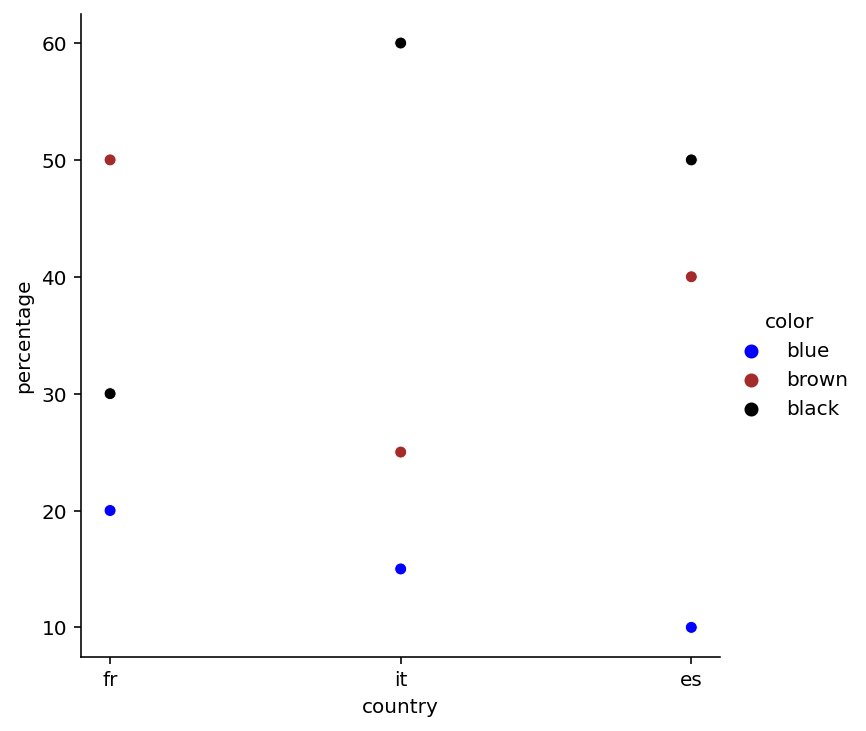

In [12]:
import seaborn as sns
sns.relplot(data=eye_color_melt, x='country', y='percentage',
hue='color', palette=['blue', 'brown', 'black'])
plt.show()

# Visualization
- https://gramener.github.io/visual-vocabulary-vega/
- https://www.youtube.com/watch?v=vTingdk_pVM
- https://www.data-to-viz.com/
- https://www.python-graph-gallery.com/
- https://github.com/mwaskom/seaborn-data
- https://github.com/altair-viz/vega_datasets
- https://seaborn.pydata.org/introduction.html
- https://seaborn.pydata.org/tutorial.html
- https://seaborn.pydata.org/tutorial/function_overview.html
- https://seaborn.pydata.org/tutorial/relational.html
- https://seaborn.pydata.org/tutorial/distributions.html
- https://seaborn.pydata.org/tutorial/categorical.html
- https://seaborn.pydata.org/tutorial/regression.html

In [14]:
# we look at a data set on penguins
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid') # white background with a grid
pen = sns.load_dataset('penguins')
pen.head(3)

species     island  bill_length_mm  bill_depth_mm  flipper_length_mm  \
0  Adelie  Torgersen            39.1           18.7              181.0   
1  Adelie  Torgersen            39.5           17.4              186.0   
2  Adelie  Torgersen            40.3           18.0              195.0   

   body_mass_g     sex  
0       3750.0    Male  
1       3800.0  Female  
2       3250.0  Female

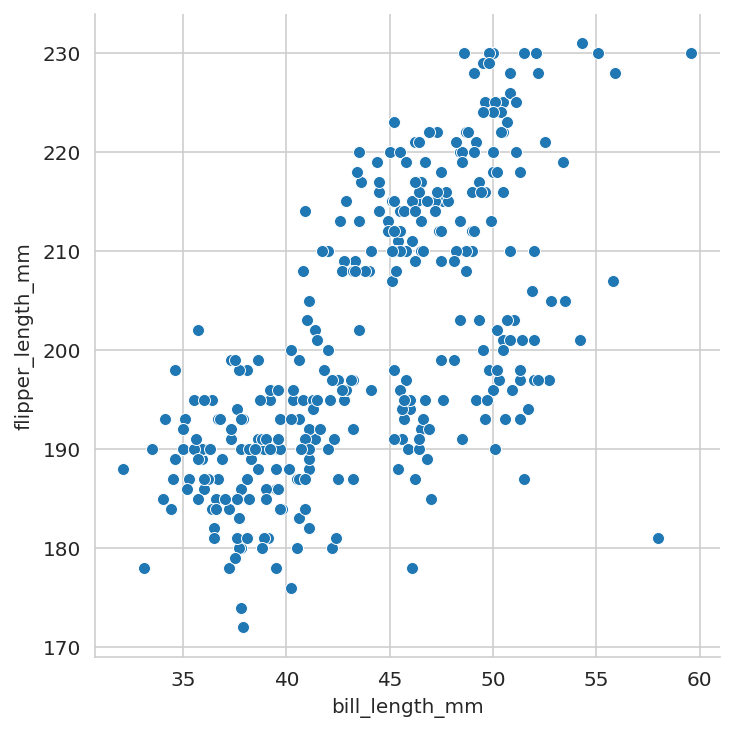

In [15]:
sns.relplot(data=pen, x='bill_length_mm', y='flipper_length_mm')

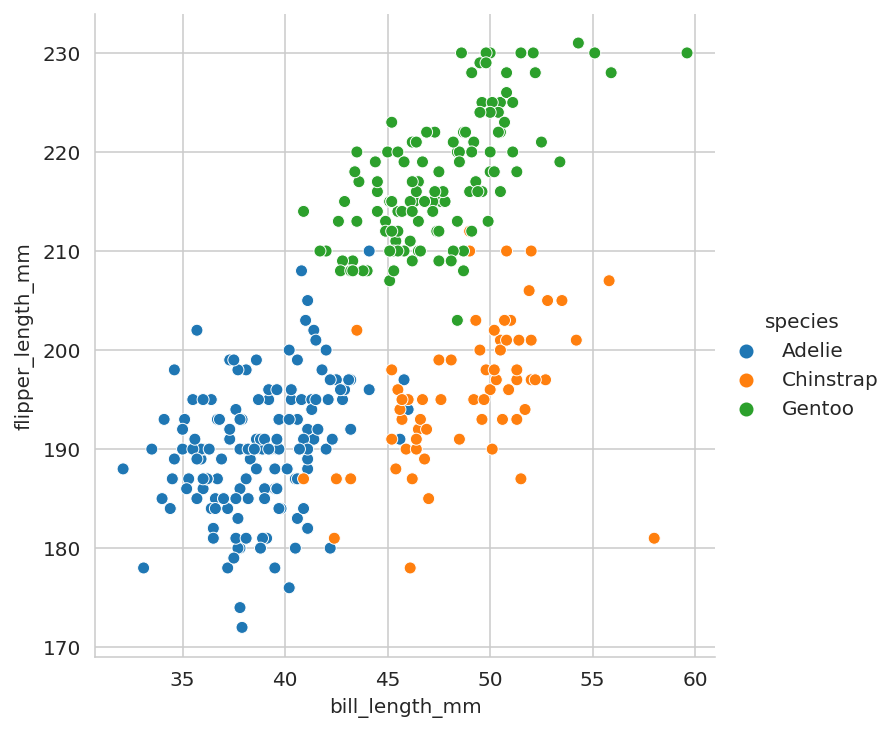

In [16]:
sns.relplot(data=pen, x='bill_length_mm', y='flipper_length_mm', hue='species')

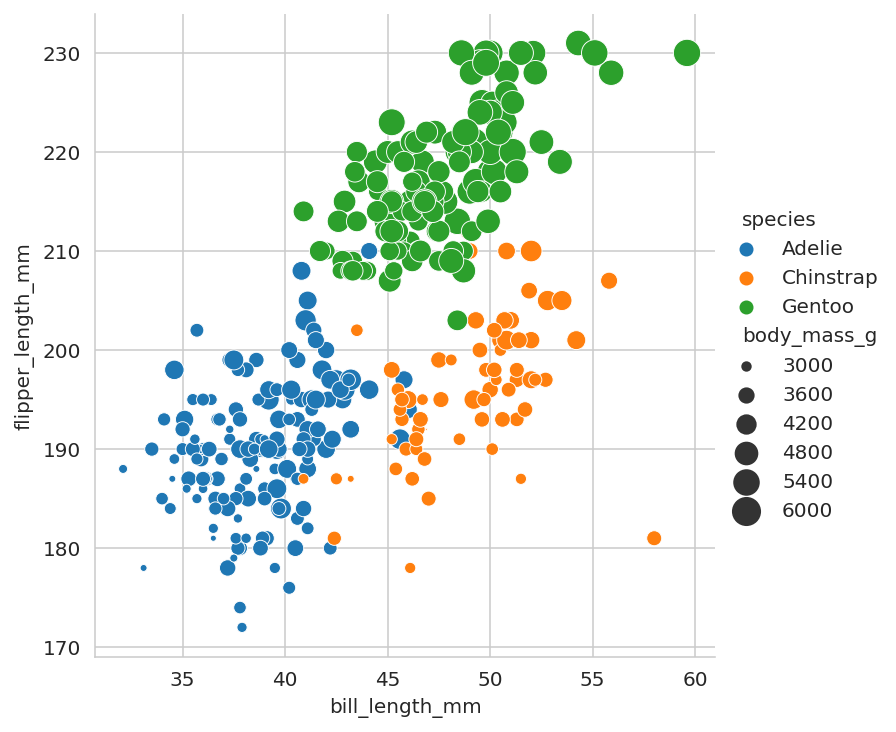

In [17]:
sns.relplot(data=pen, x='bill_length_mm', y='flipper_length_mm', hue='species', size='body_mass_g', sizes=(1, 200))

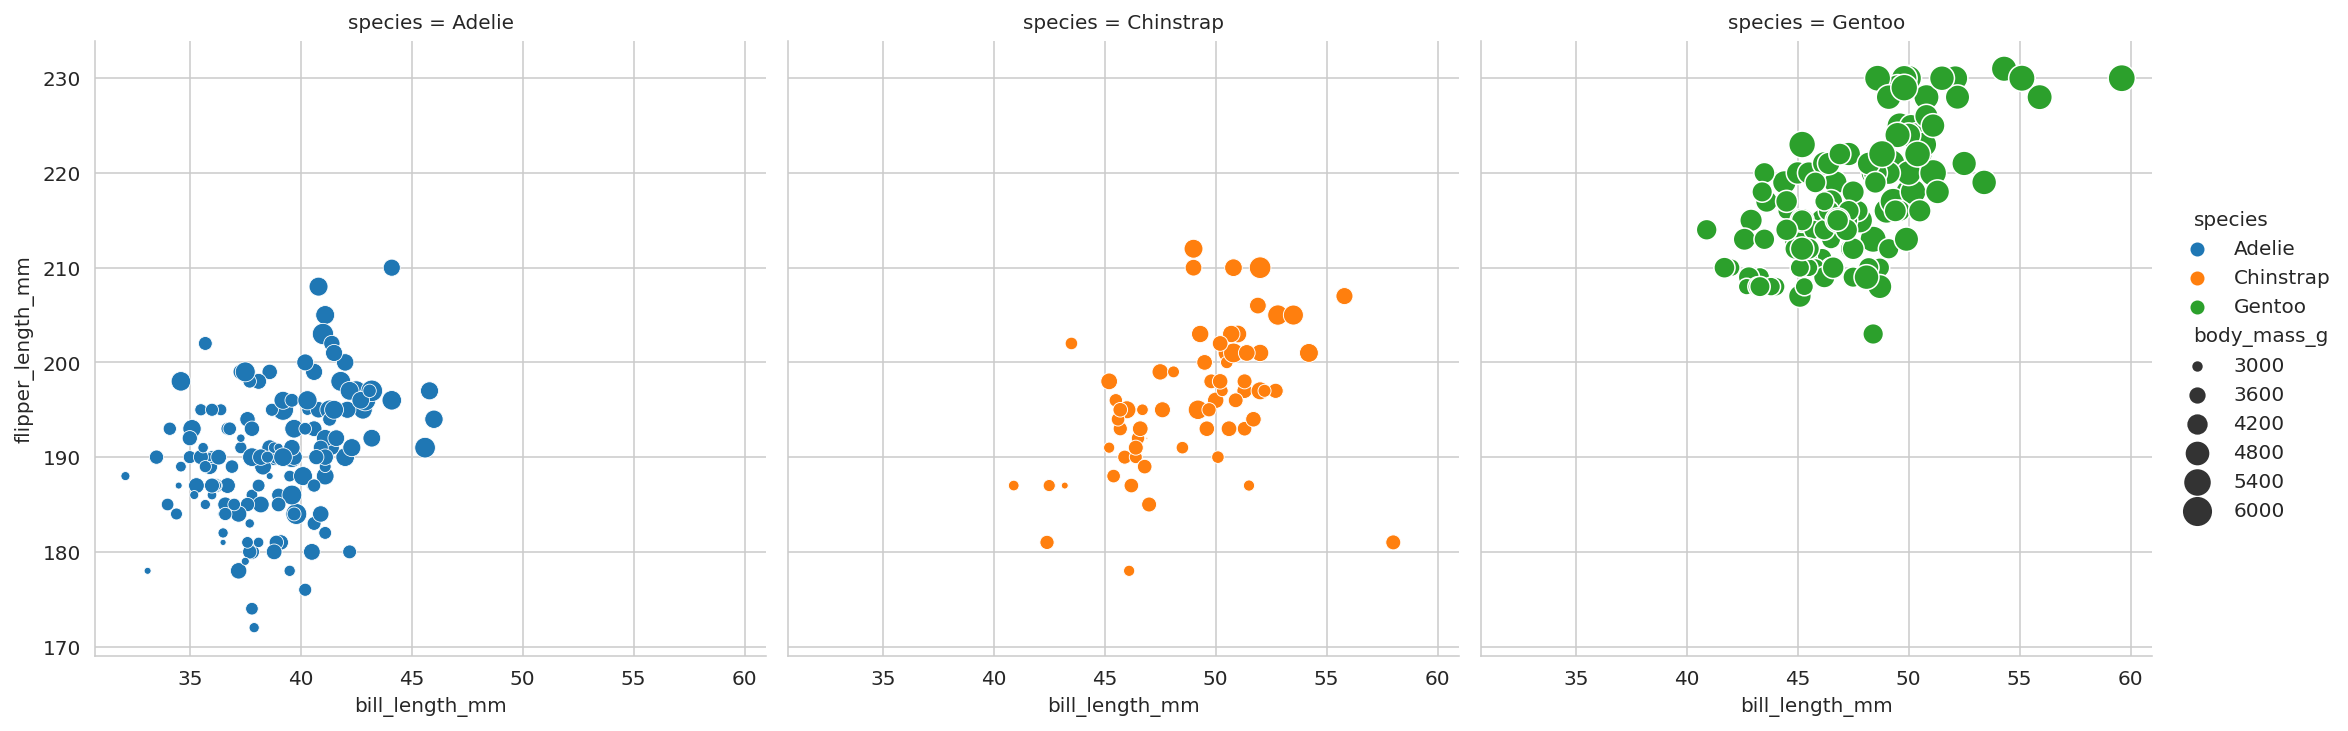

In [18]:
sns.relplot(data=pen, x='bill_length_mm', y='flipper_length_mm', hue='species', size='body_mass_g', sizes=(1, 200), col='species')

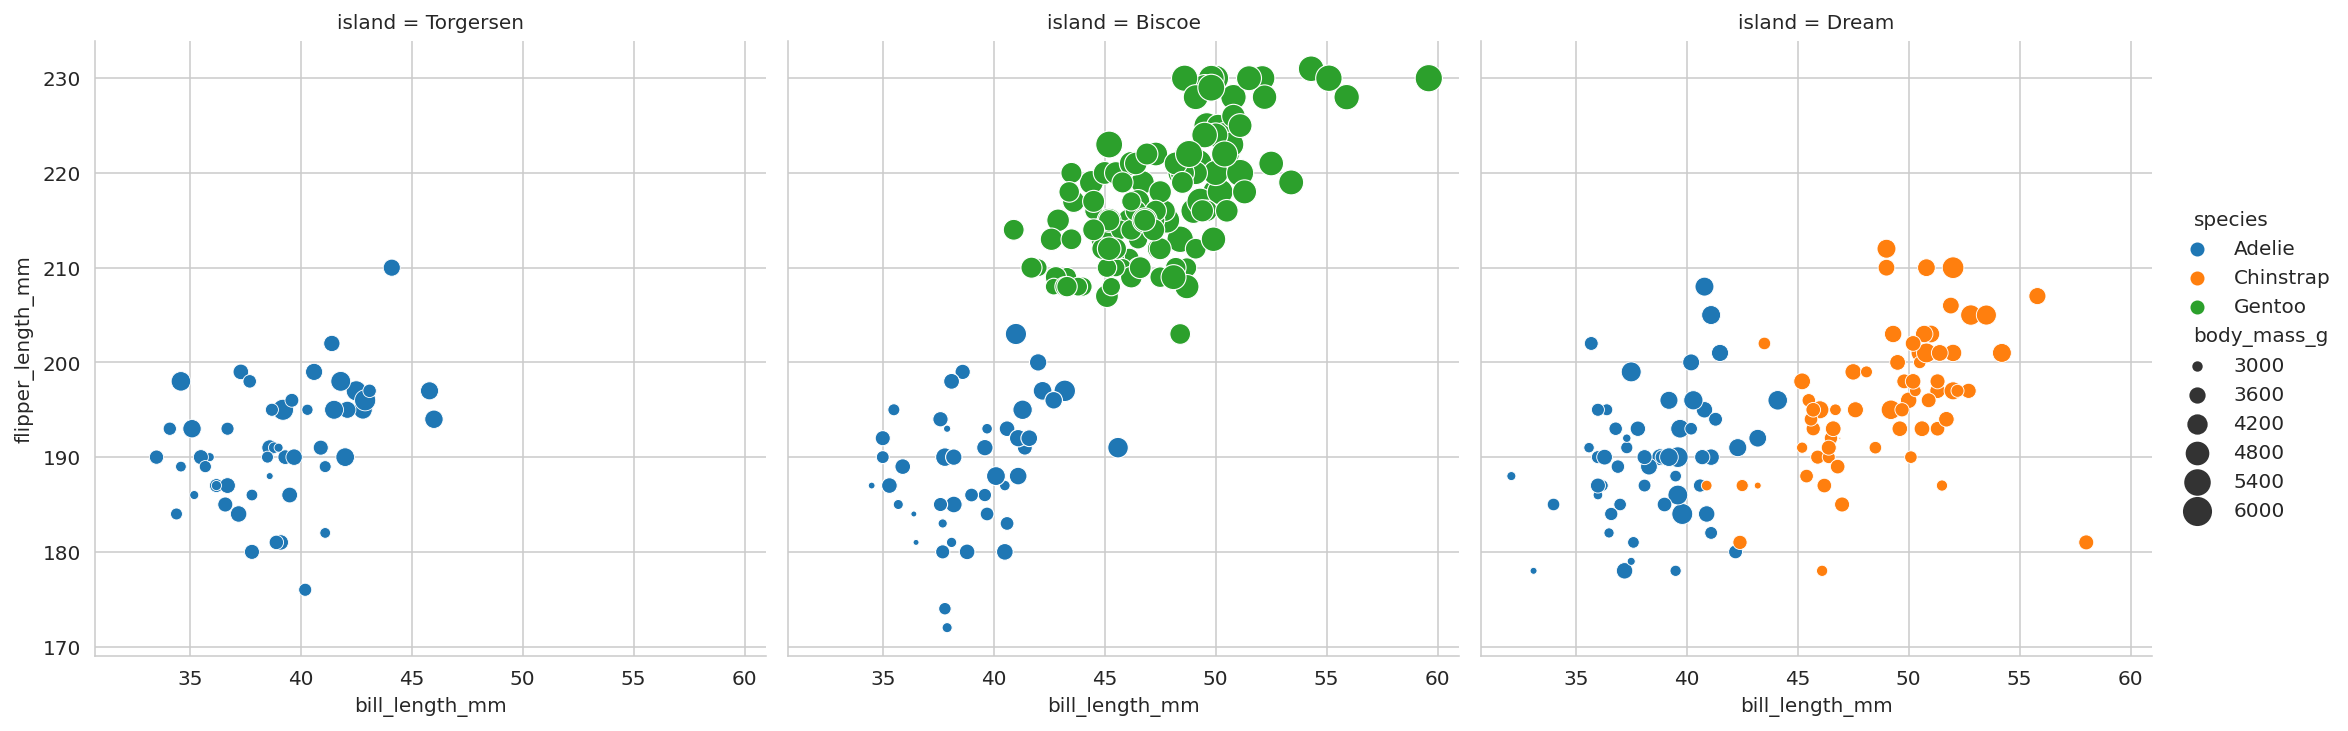

In [19]:
sns.relplot(data=pen, x='bill_length_mm', y='flipper_length_mm', hue='species', size='body_mass_g', sizes=(1, 200), col='island')

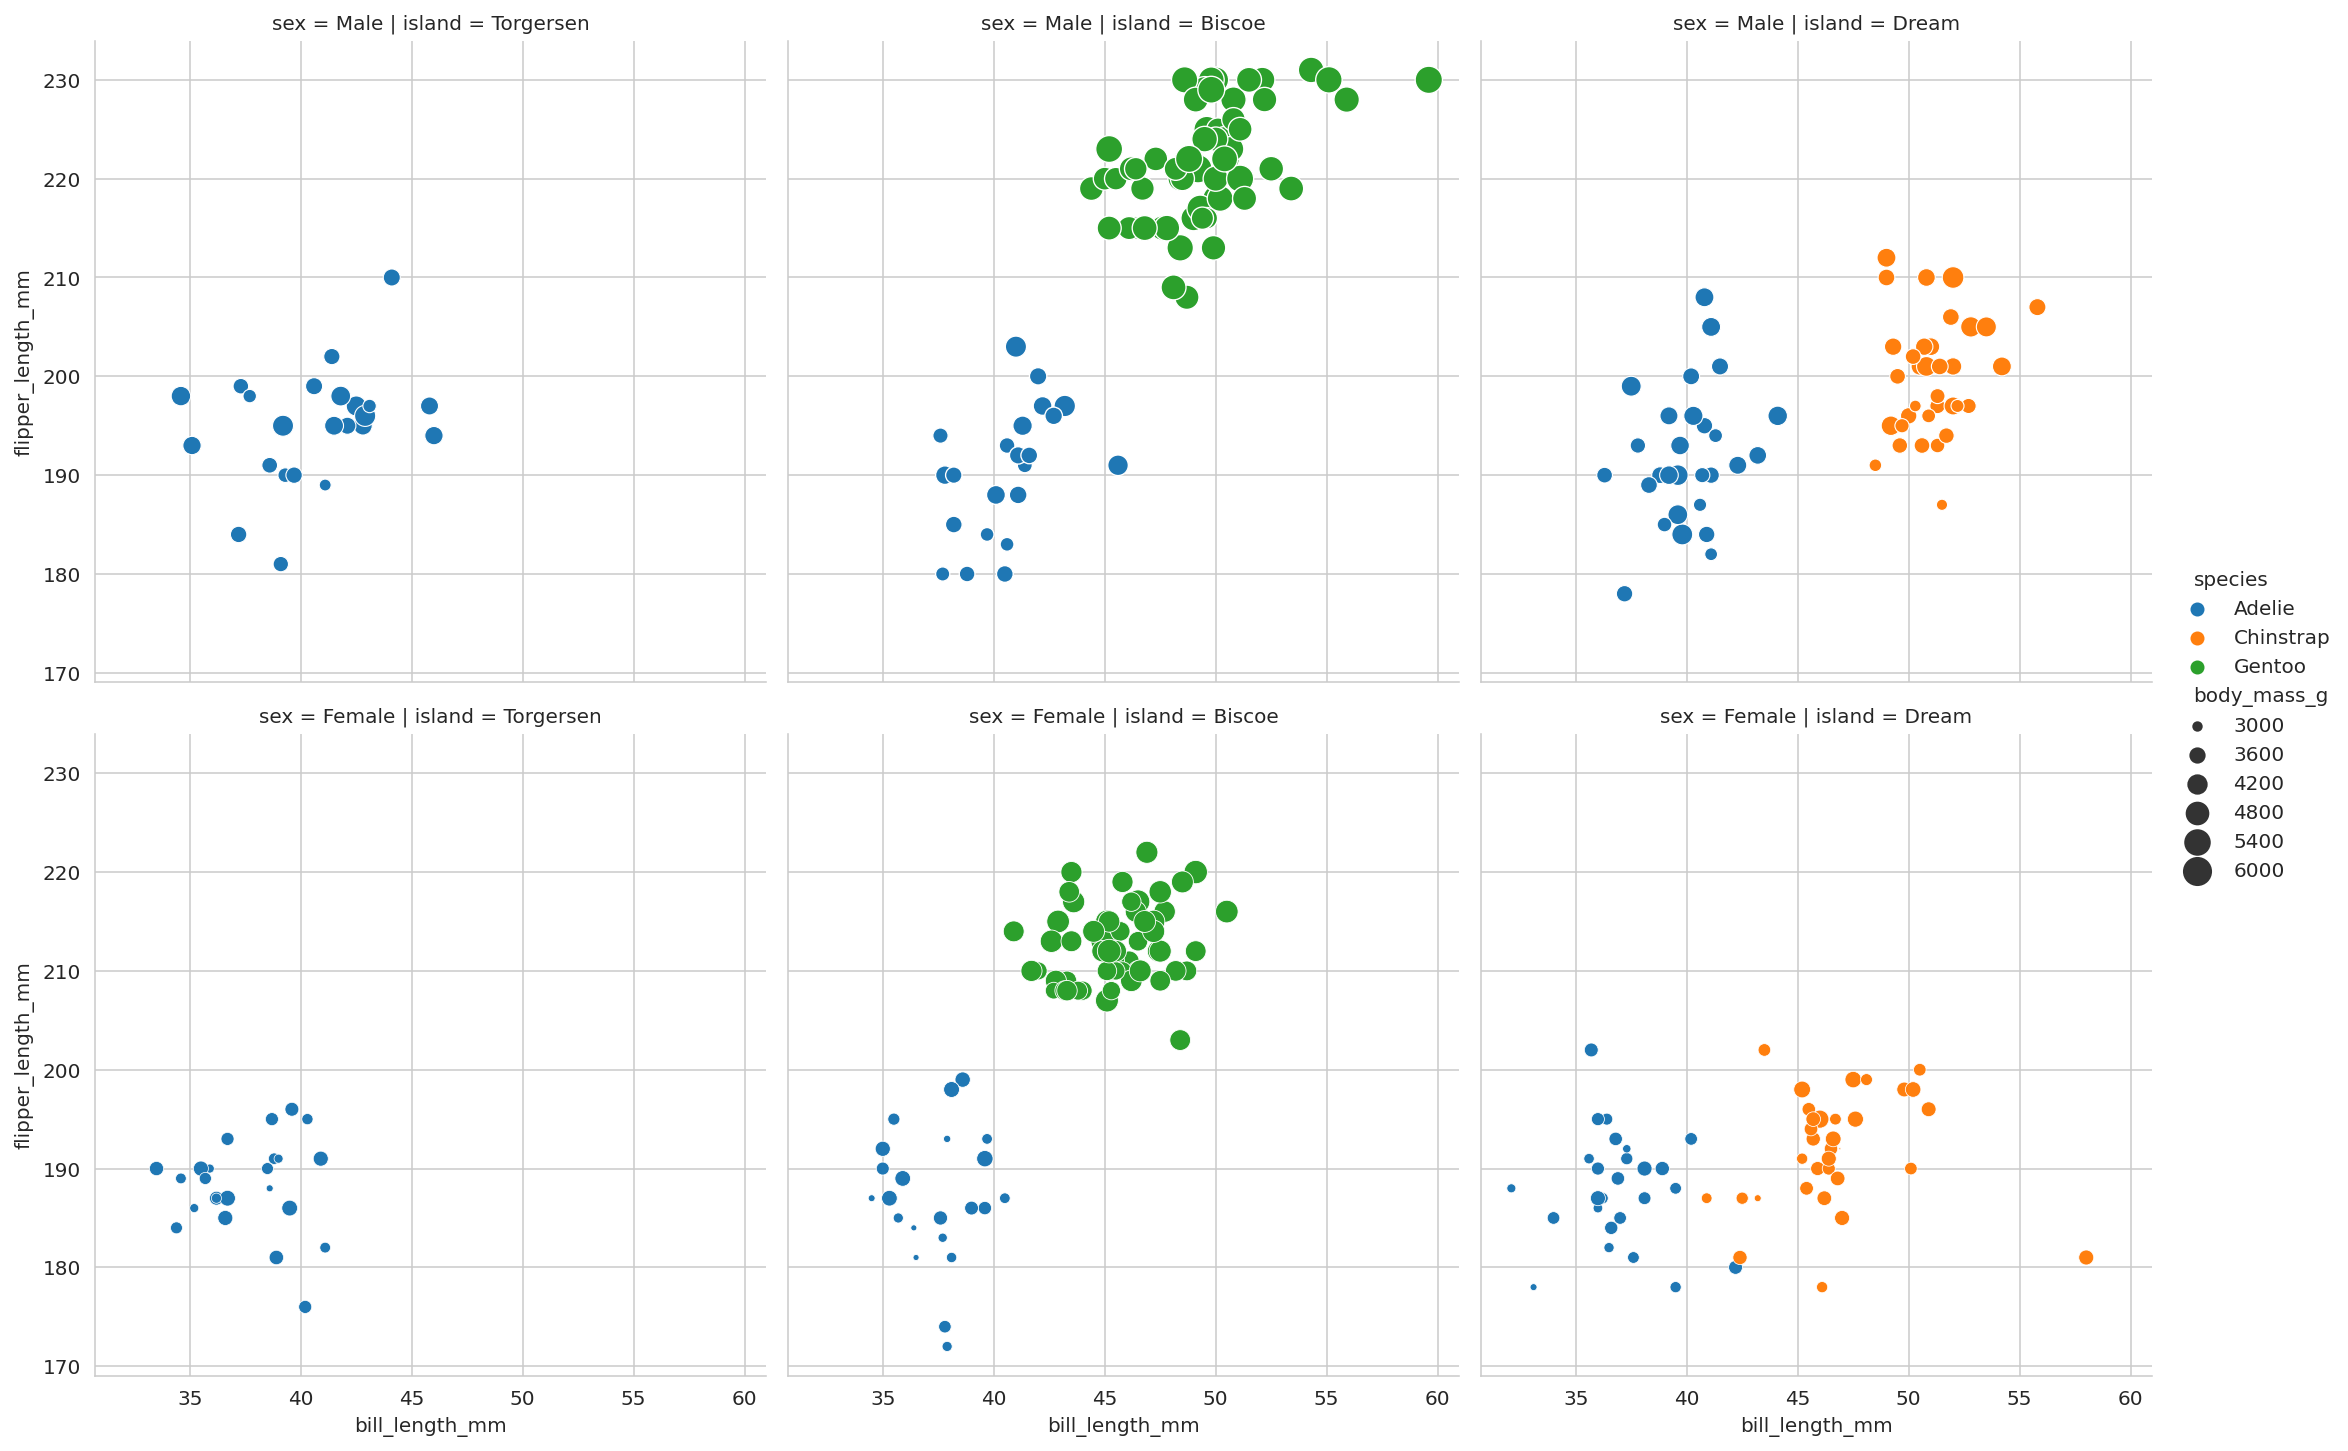

In [20]:
sns.relplot(data=pen, x='bill_length_mm', y='flipper_length_mm', hue='species', size='body_mass_g', sizes=(1, 200), col='island', row='sex')

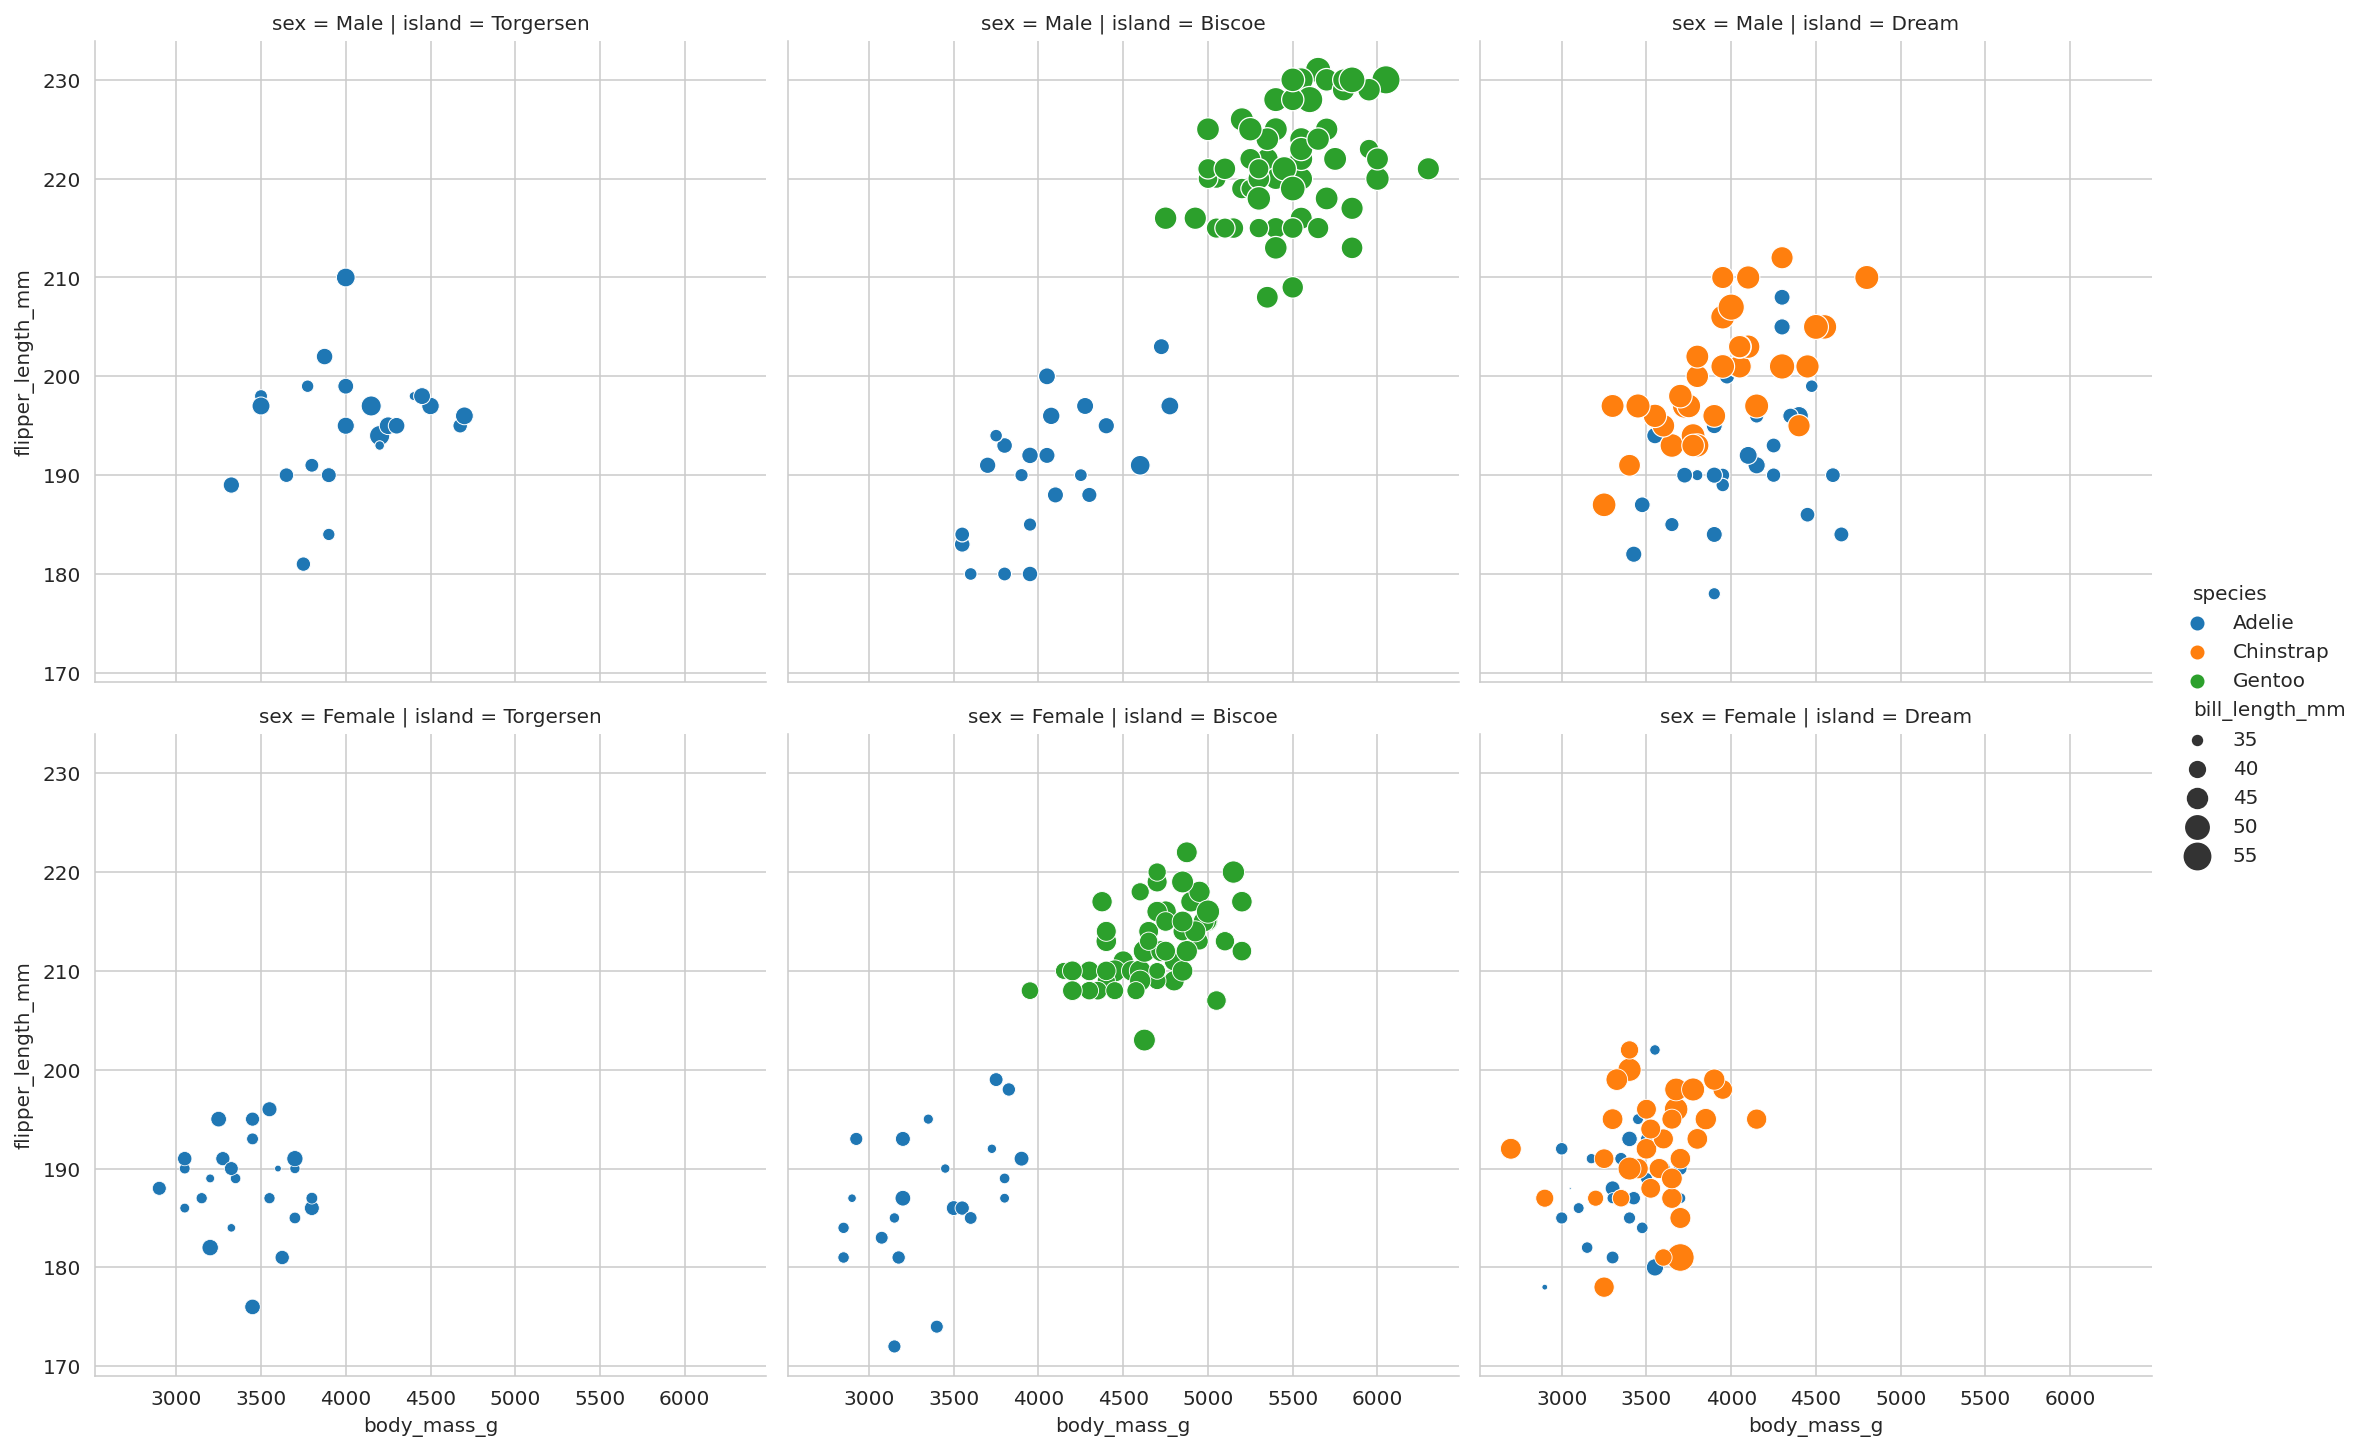

In [21]:
sns.relplot(data=pen, x='body_mass_g', y='flipper_length_mm', hue='species', size='bill_length_mm', sizes=(1, 200), col='island', row='sex')

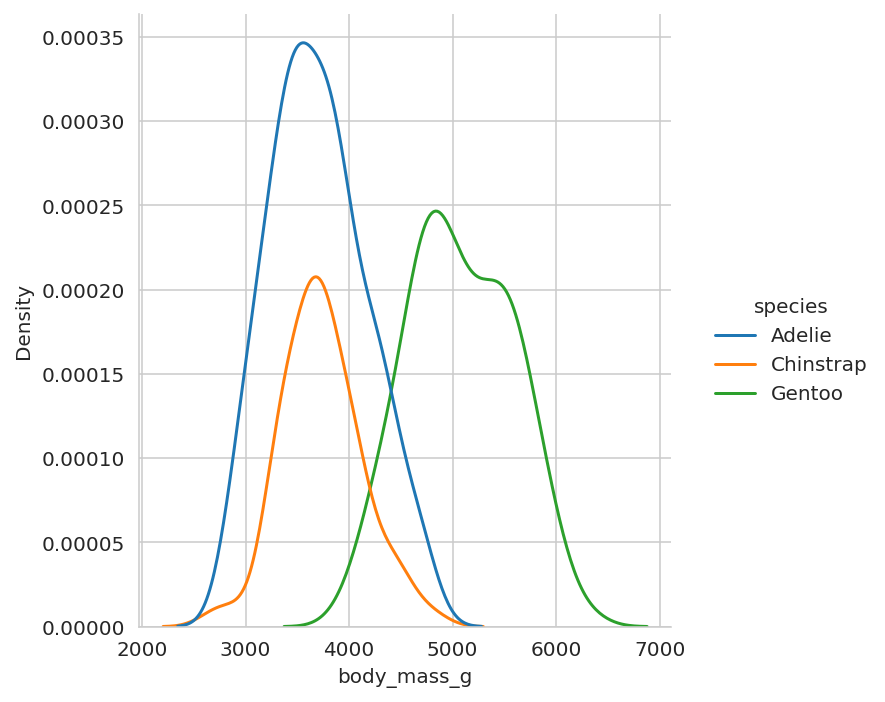

In [22]:
sns.displot(data=pen, x='body_mass_g', hue='species', kind='kde')

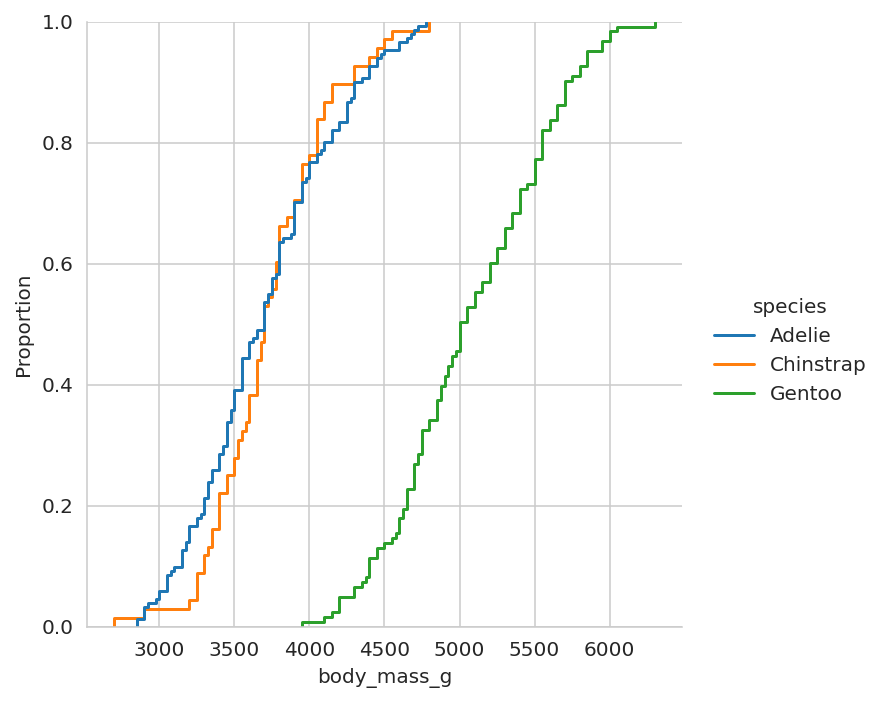

In [23]:
sns.displot(data=pen, x='body_mass_g', hue='species', kind='ecdf')

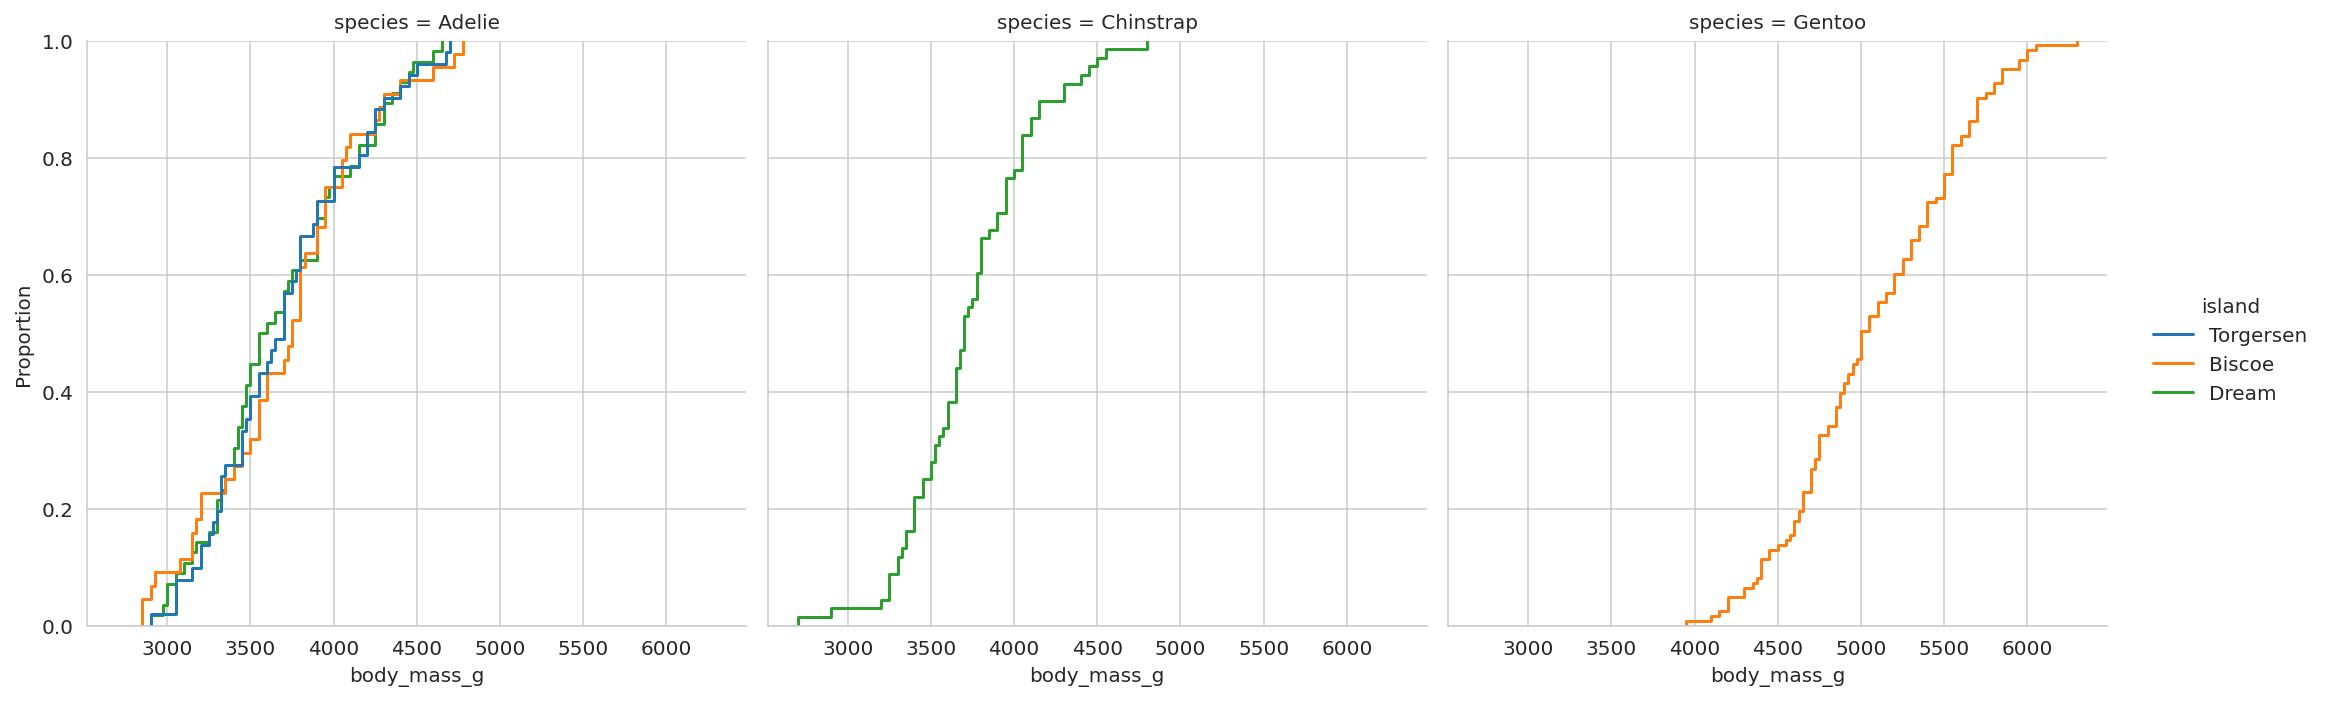

In [24]:
sns.displot(data=pen, x='body_mass_g', hue='island', kind='ecdf', col='species')

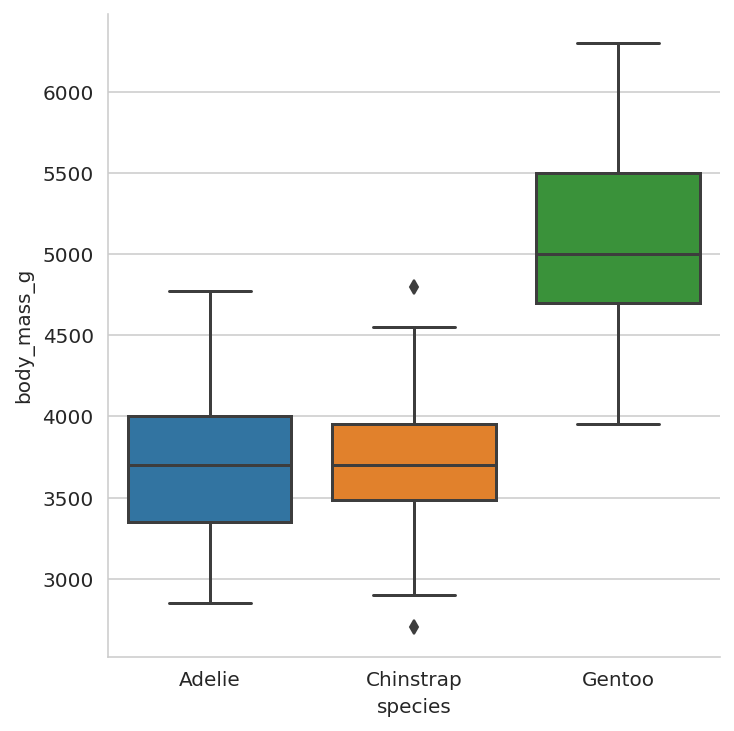

In [25]:
sns.catplot(data=pen, x='species', y='body_mass_g', kind='box')

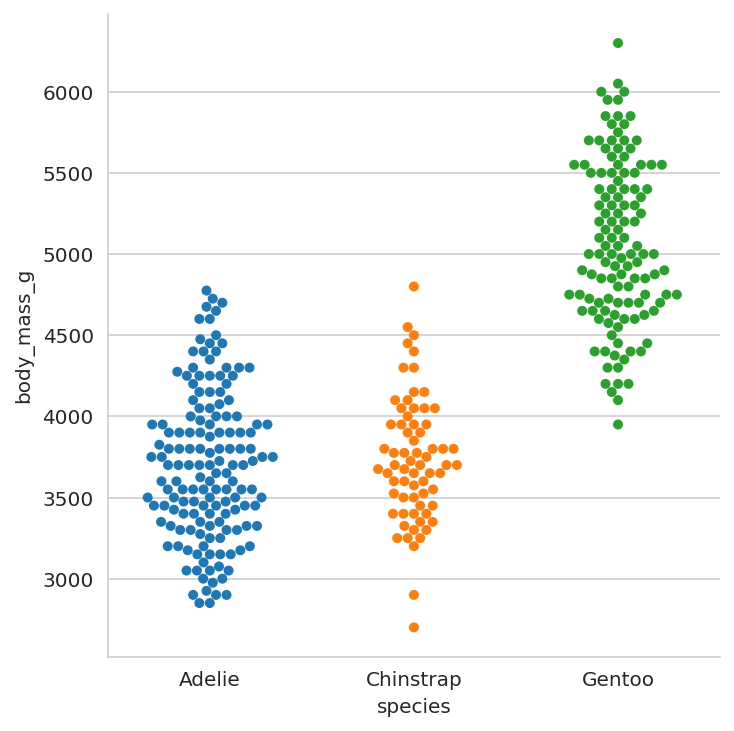

In [26]:
sns.catplot(data=pen, x='species', y='body_mass_g', kind='swarm')

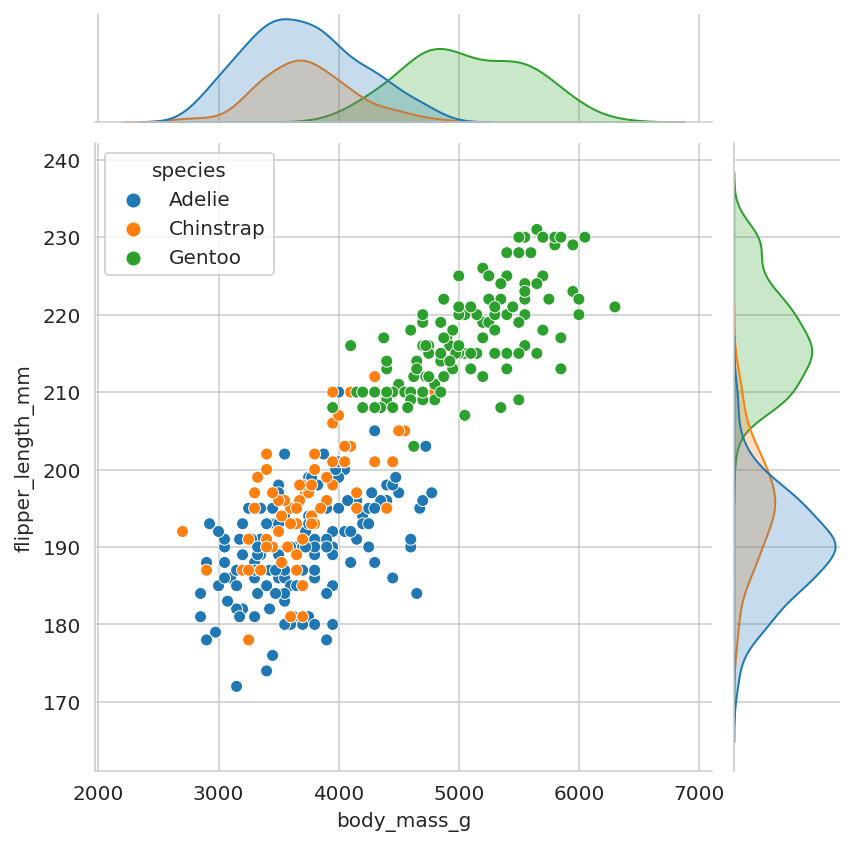

In [27]:
sns.jointplot(data=pen, x='body_mass_g', y='flipper_length_mm', hue='species')

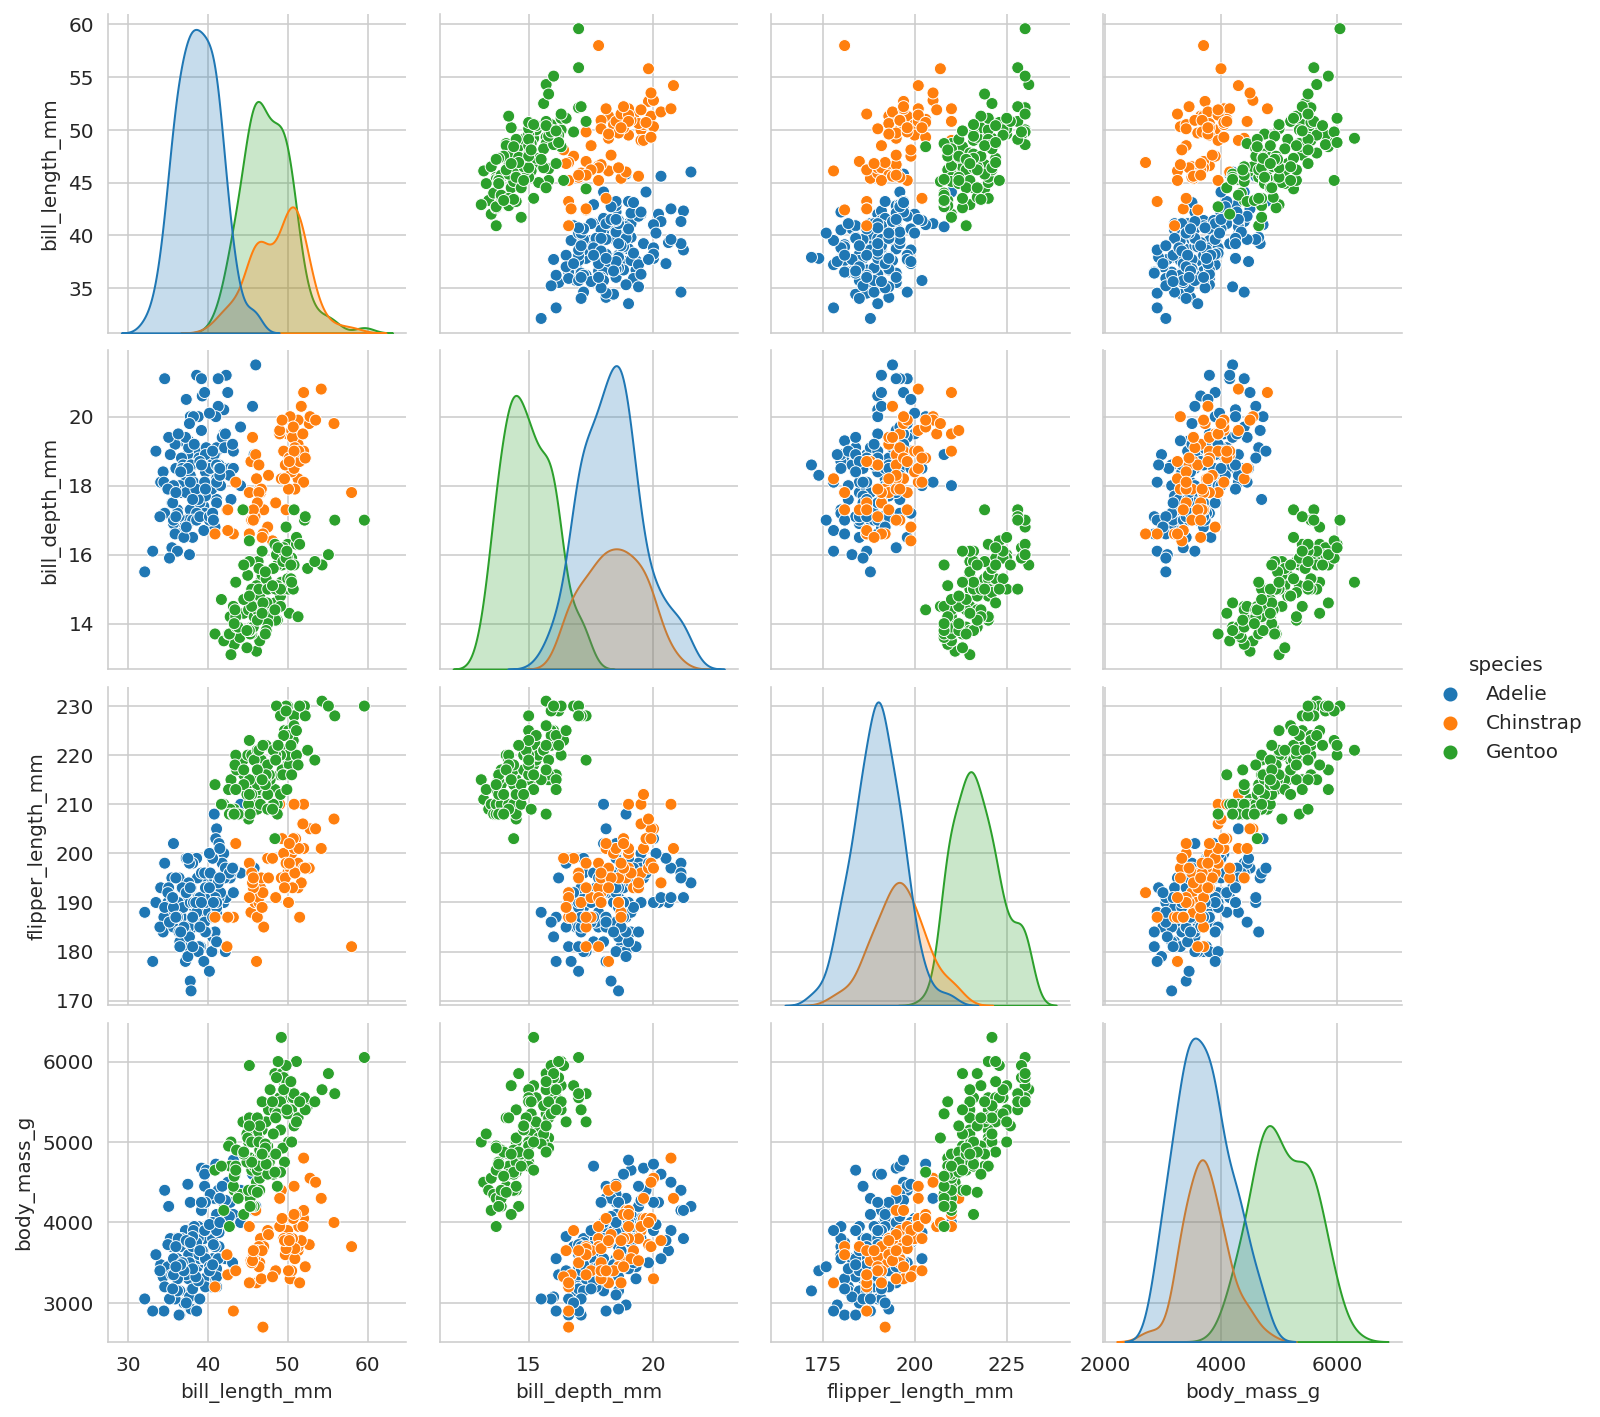

In [28]:
sns.pairplot(data=pen, hue='species')

In [29]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

<Figure size 432x288 with 0 Axes>

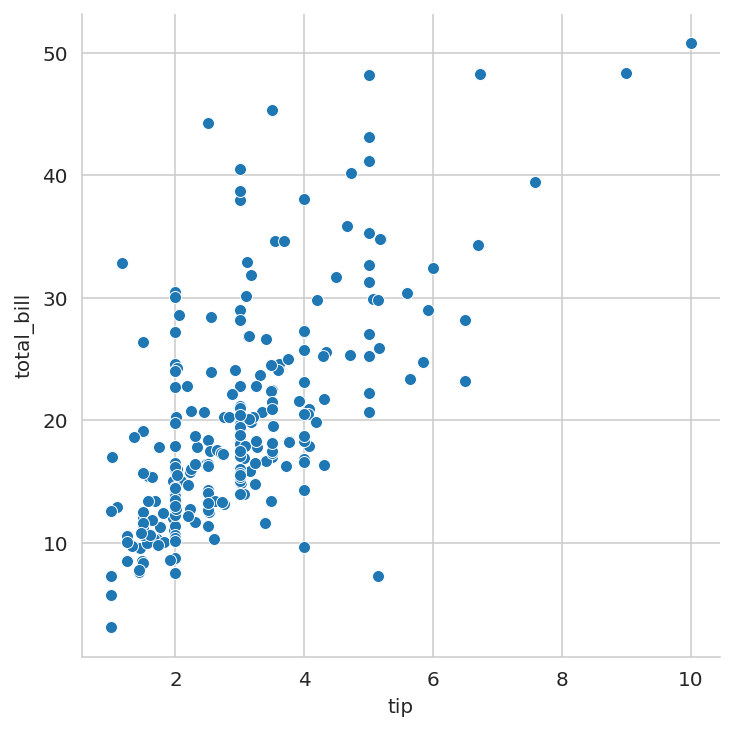

In [30]:
tips = sns.load_dataset('tips')
sns.set_style('whitegrid') # white background with a grid
sns.despine(left=True) # remove the left axis line
sns.relplot(
    data = tips, # the data to plot
    x = 'tip', # the x-axis
    y = 'total_bill'# the y-axis
    )
plt.savefig('test.png', dpi=150) # just to save on disk

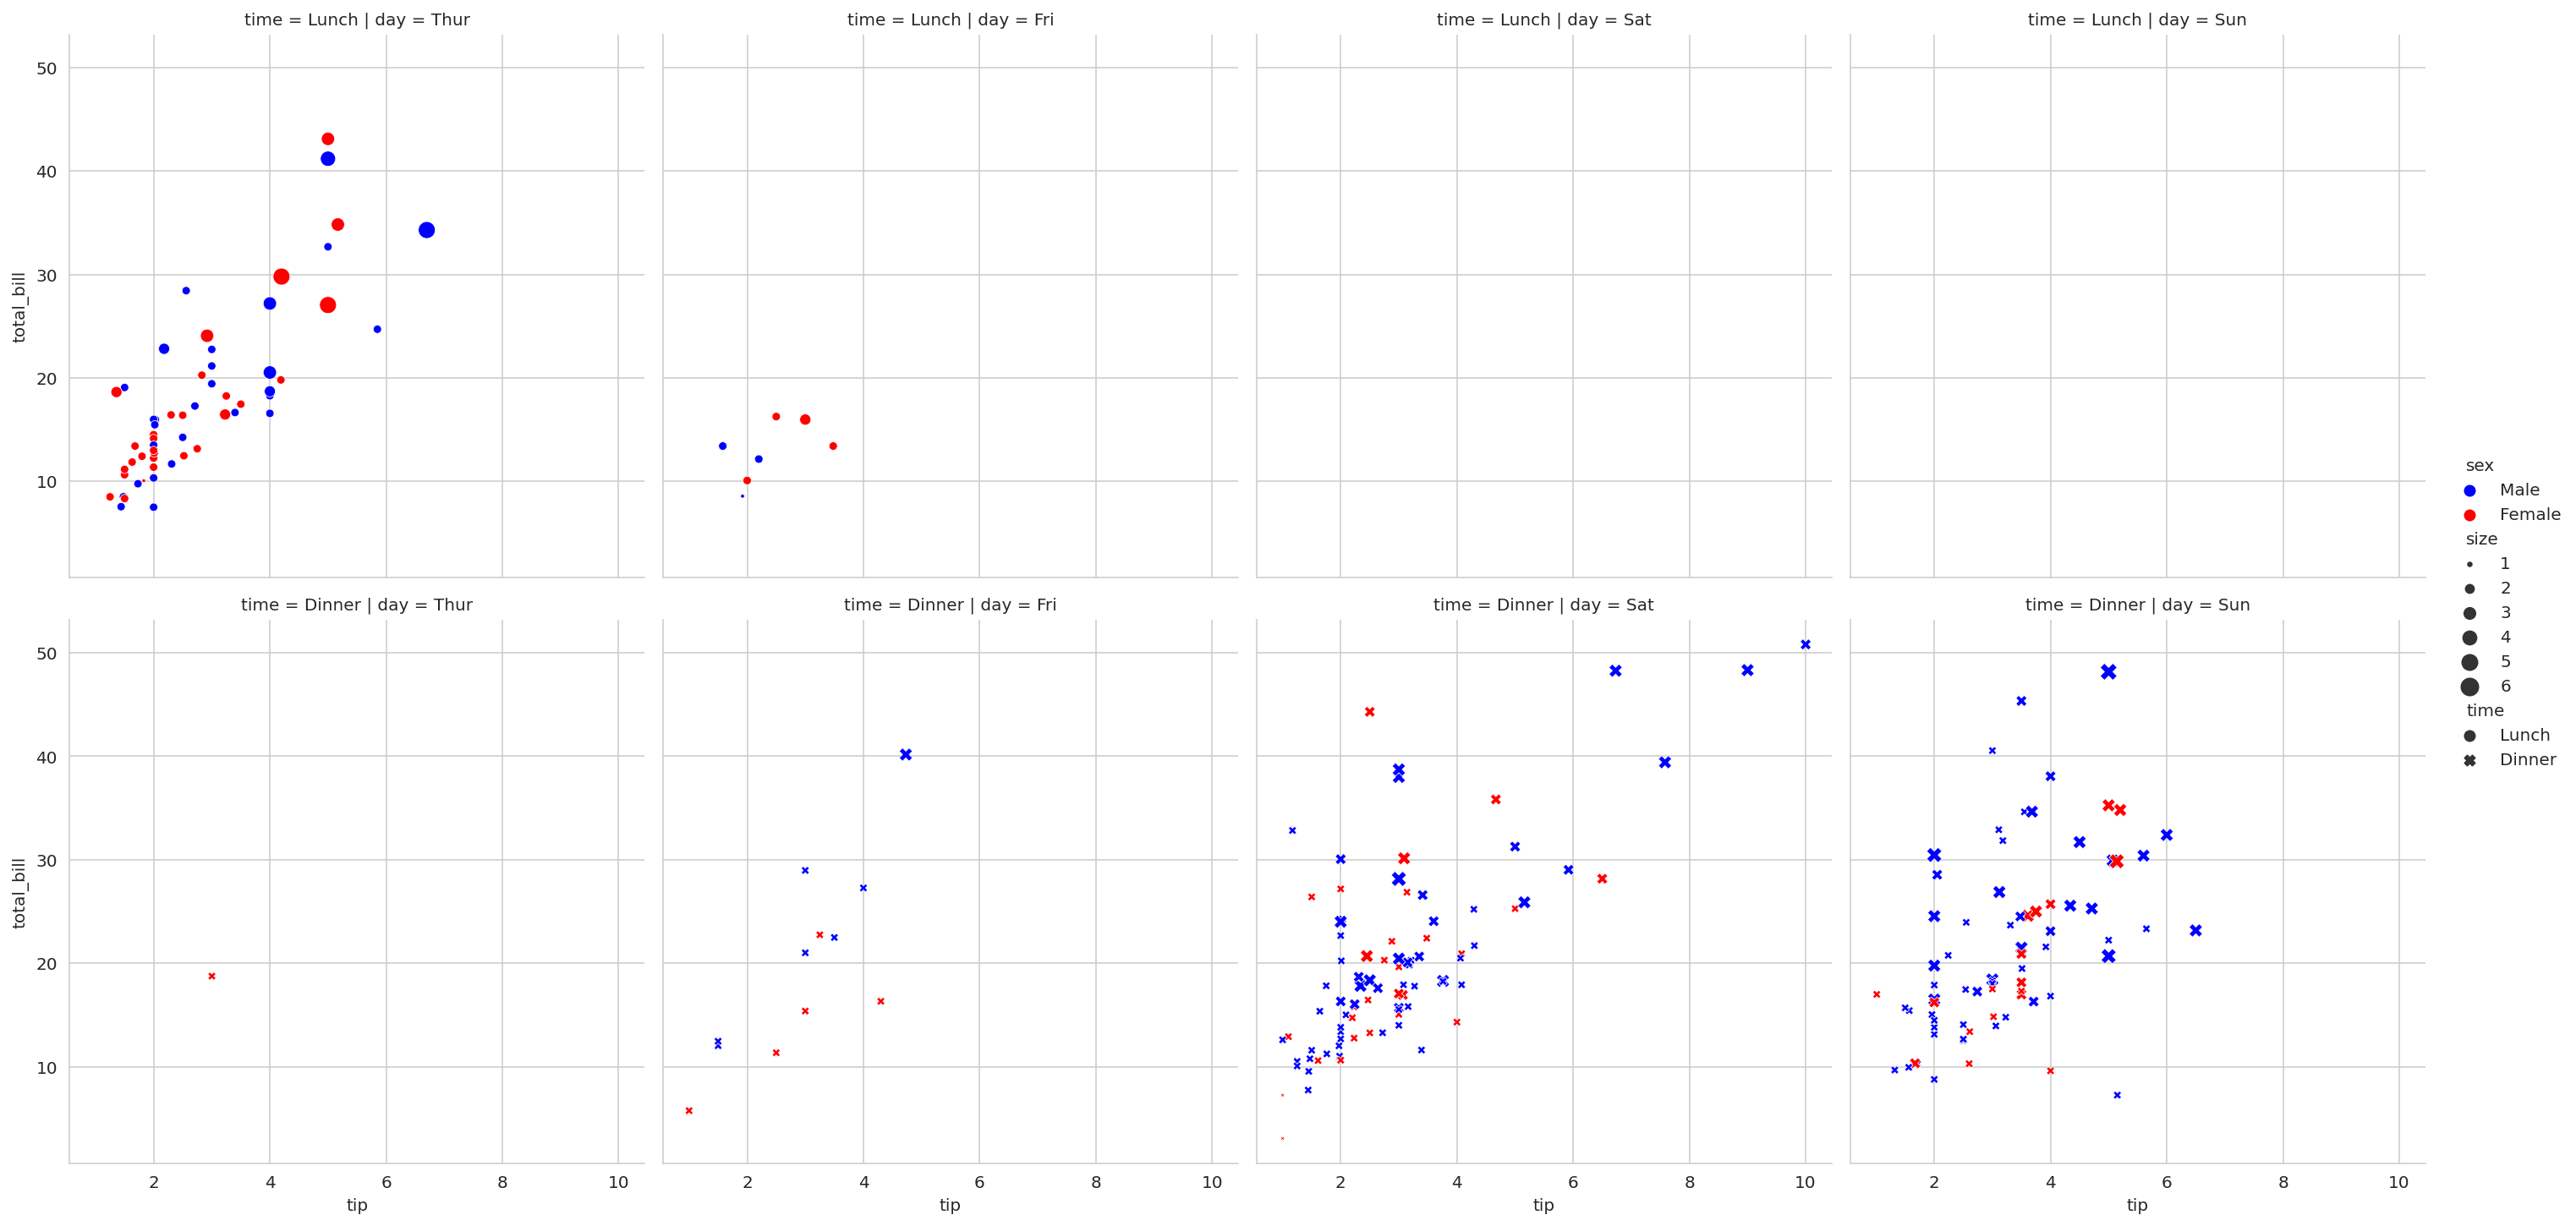

In [31]:
# dimensionalities (6 dimensions in this example)
sns.relplot(
    data = tips, # the data to plot
    x = 'tip', # the x-axis
    y = 'total_bill', # the y-axis
    size = 'size', # the dot size
    hue = 'sex', # the dot color
    style = 'time', # the dot shape
    col = 'day', # subplots in column
    #col_wrap = 2,
    row = 'time',
    sizes = (5, 100),
    palette = {'Male': 'blue', 'Female': 'red'}
    )
plt.savefig('test.png', dpi=150) # just to save on disk

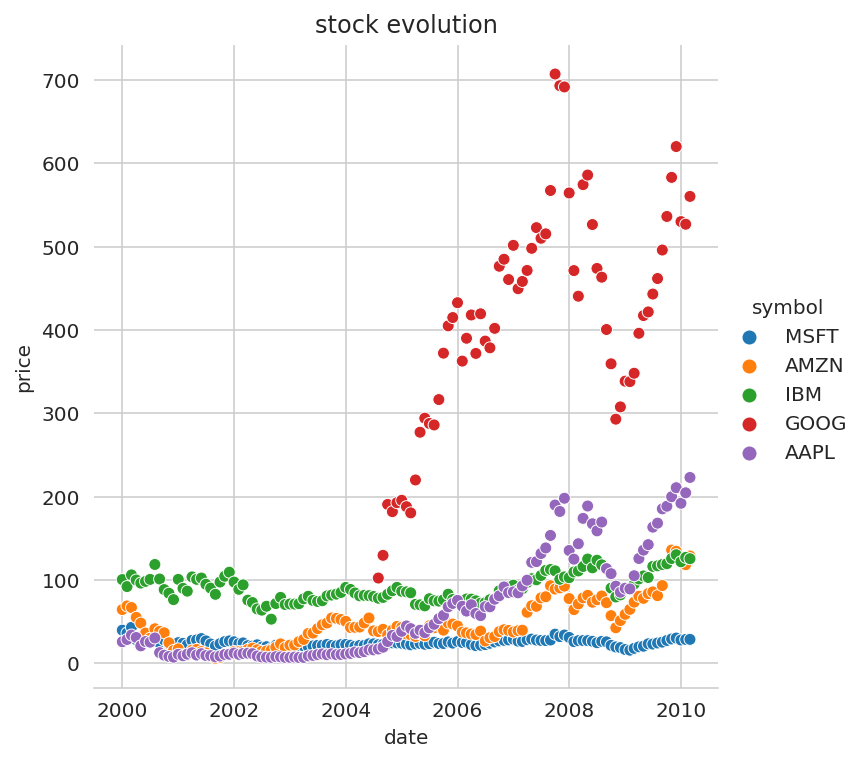

In [32]:
import altair as alt
from vega_datasets import data
stocks = data.stocks()
sns.relplot(data=stocks,
    x='date', y='price',
    hue='symbol'
           )
sns.despine(left=True)
plt.title('stock evolution')
plt.savefig('test.png', dpi=150)

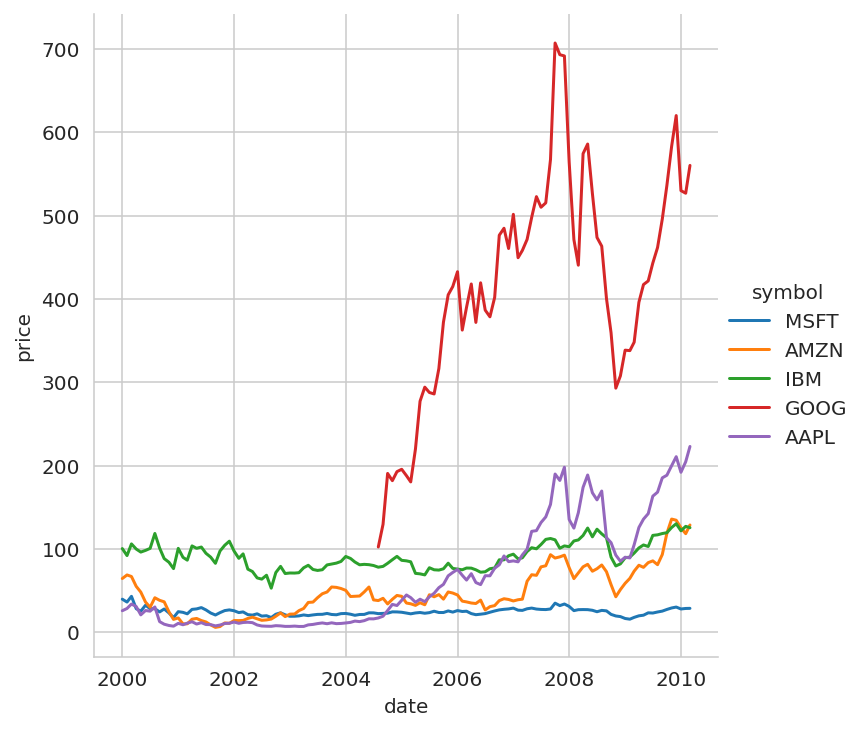

In [33]:
# we access the stock dataset from altair
import altair as alt
from vega_datasets import data
stocks = data.stocks()
sns.relplot(x='date', y='price',
            hue='symbol', kind='line', data=stocks)
plt.savefig('test.png', dpi=150)

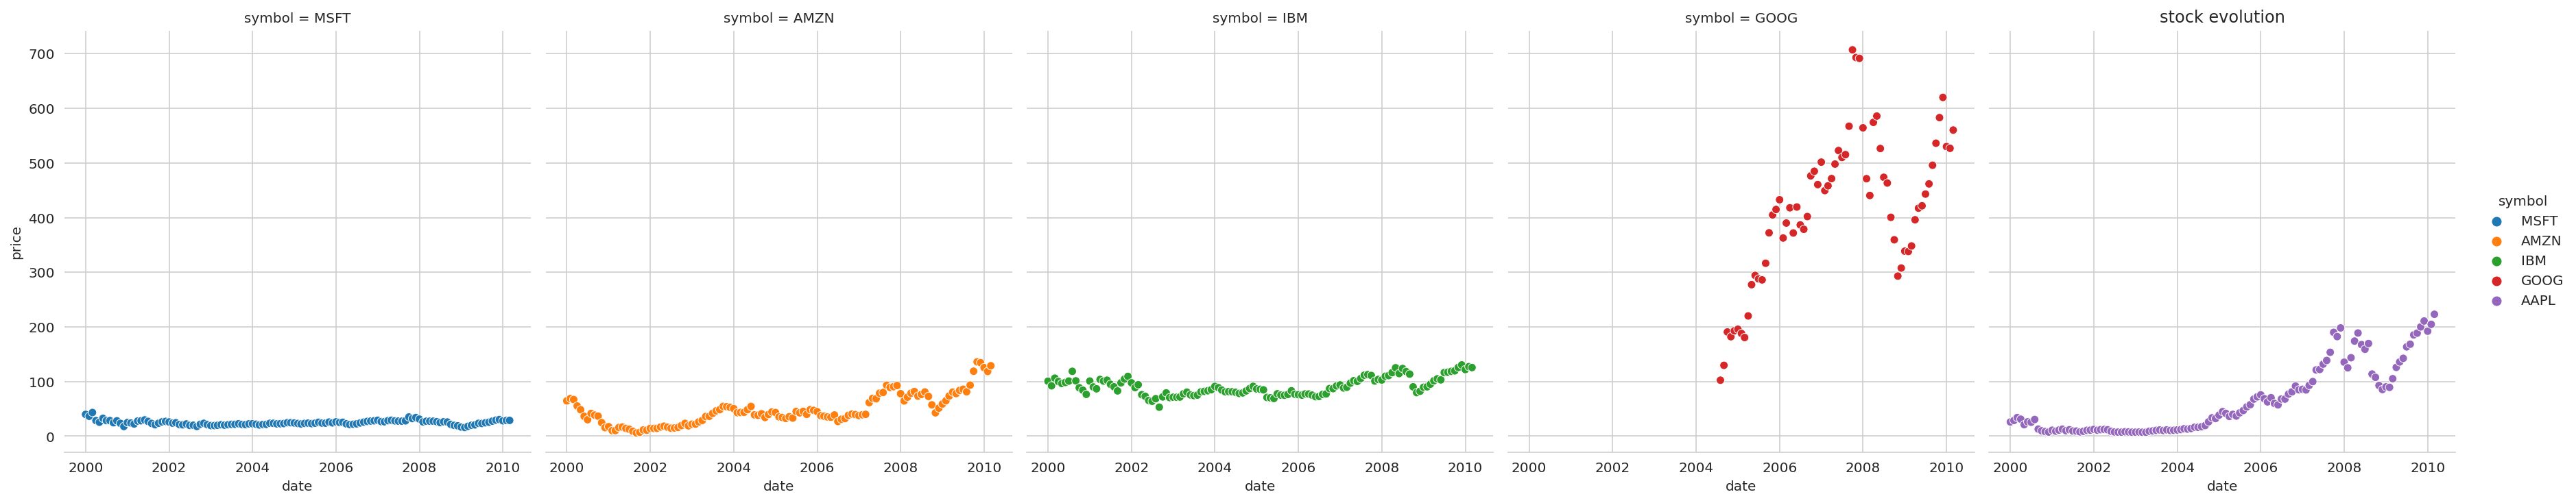

In [34]:
sns.relplot(data=stocks,
            x='date', y='price',
            hue='symbol', col='symbol')
sns.despine(left=True)
plt.title('stock evolution')
plt.savefig('test.png', dpi=150)

In [35]:
# resonance imaging (fmri)
import seaborn as sns
fmri = sns.load_dataset("fmri")
fmri.head()

subject  timepoint event    region    signal
0     s13         18  stim  parietal -0.017552
1      s5         14  stim  parietal -0.080883
2     s12         18  stim  parietal -0.081033
3     s11         18  stim  parietal -0.046134
4     s10         18  stim  parietal -0.037970

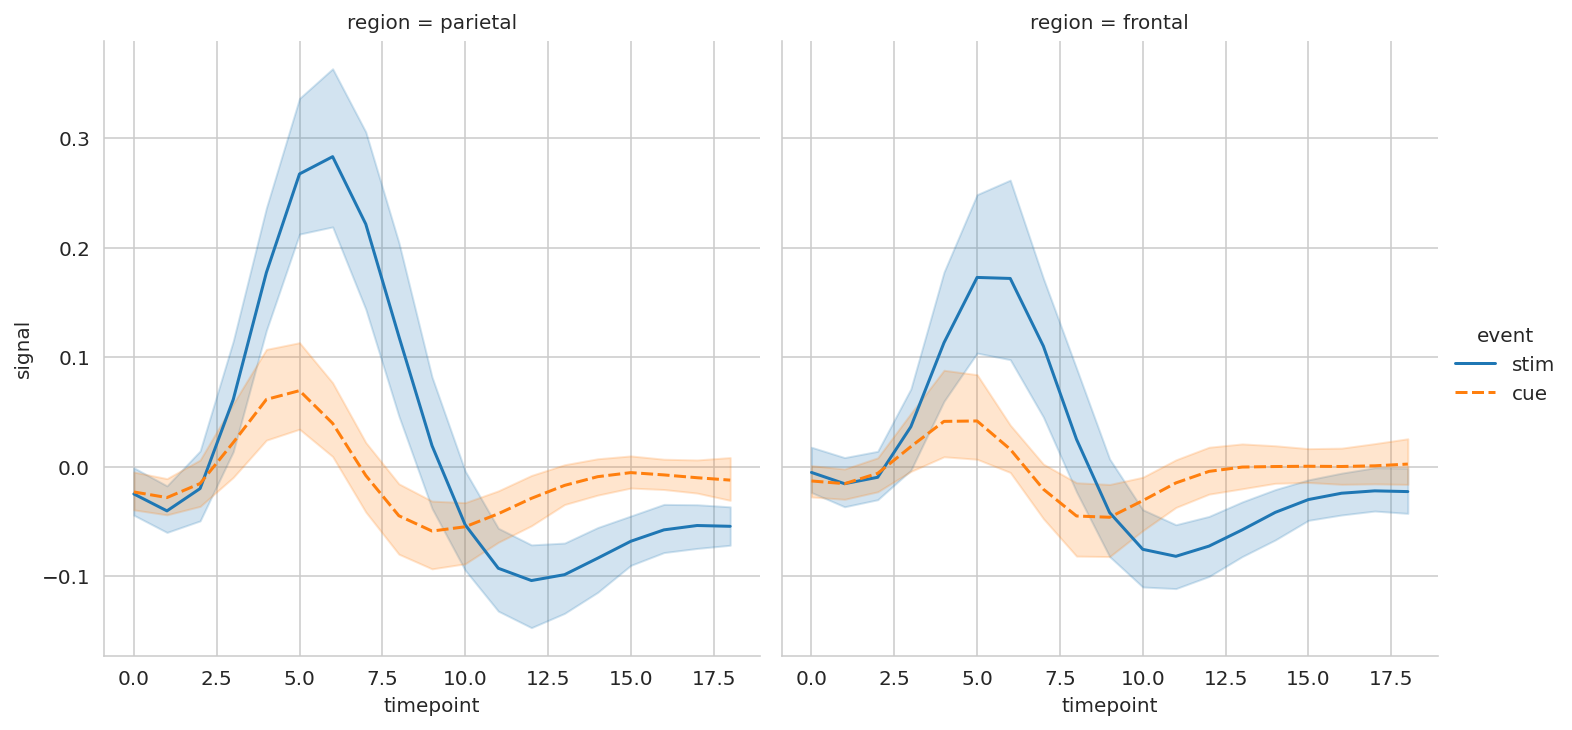

In [37]:
sns.relplot(x="timepoint", y="signal", col="region",
            hue="event", style="event", kind="line",
            data=fmri, ci=99); # by default ci is 95
plt.savefig('test.png', dpi=150)

### Catplot

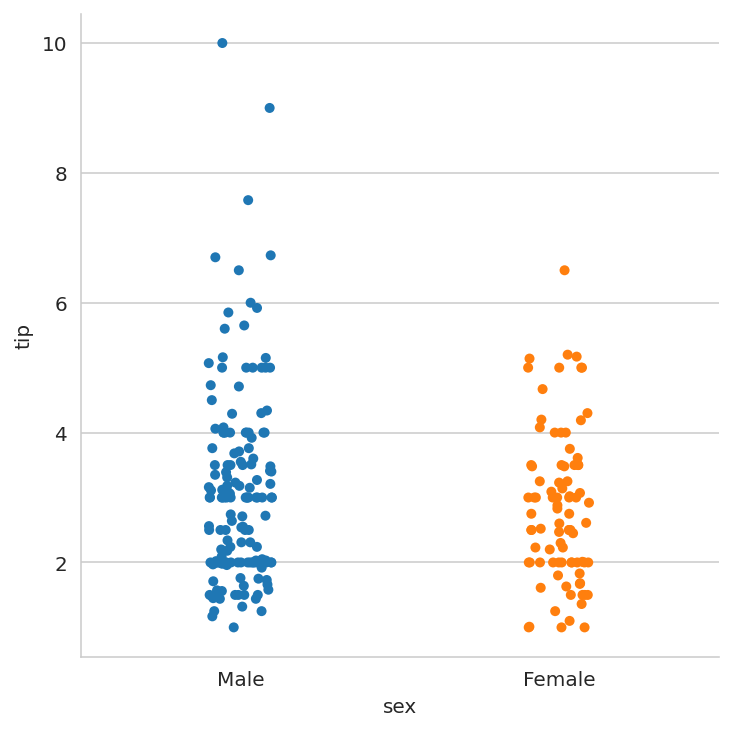

In [47]:
sns.catplot(x="sex", y="tip", data=tips) # Stripplot

/usr/local/lib/python3.8/dist-packages/seaborn/categorical.py:1296: UserWarning: 5.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


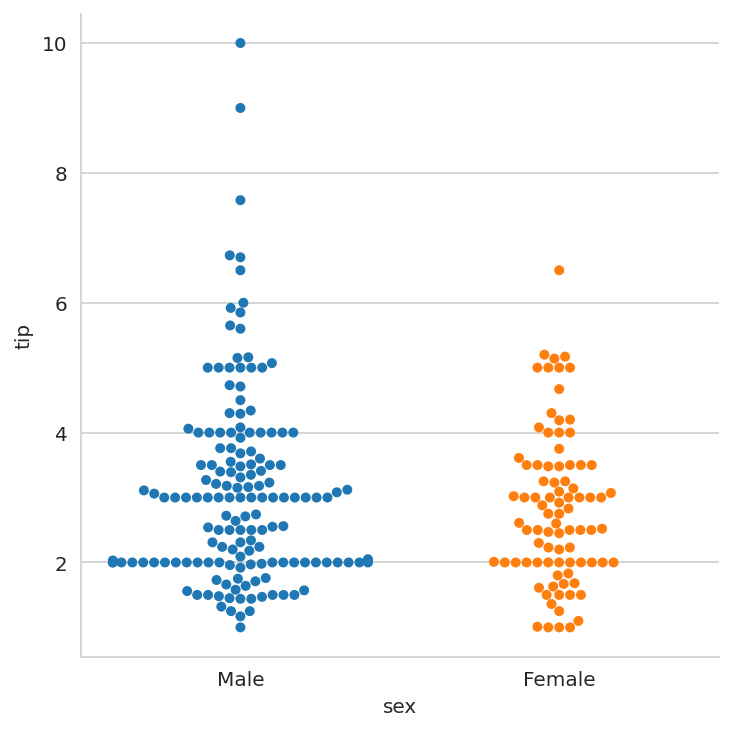

In [48]:
sns.catplot(x="sex", y="tip", kind="swarm", data=tips) # Swarmplot

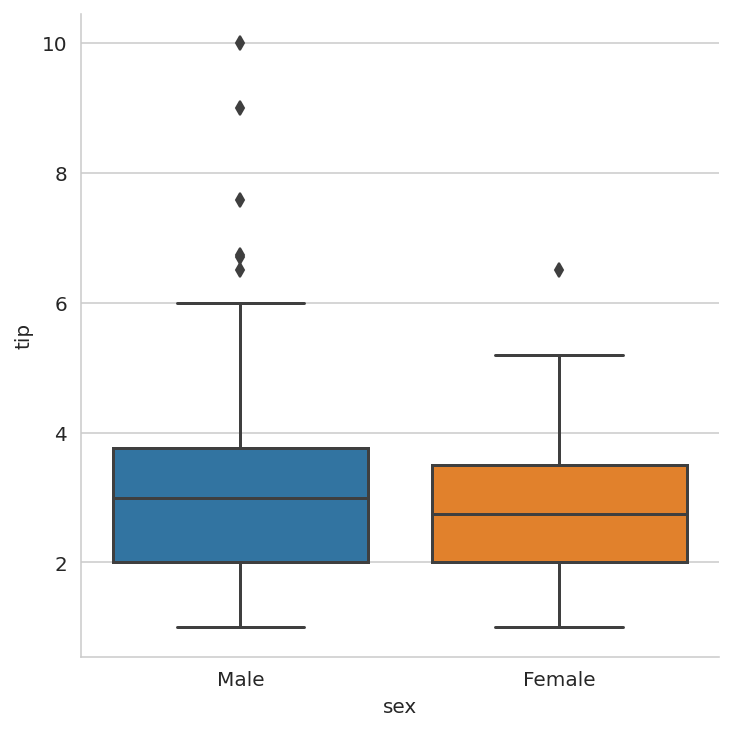

In [49]:
sns.catplot(x="sex", y="tip", kind='box', data=tips); # Boxplot

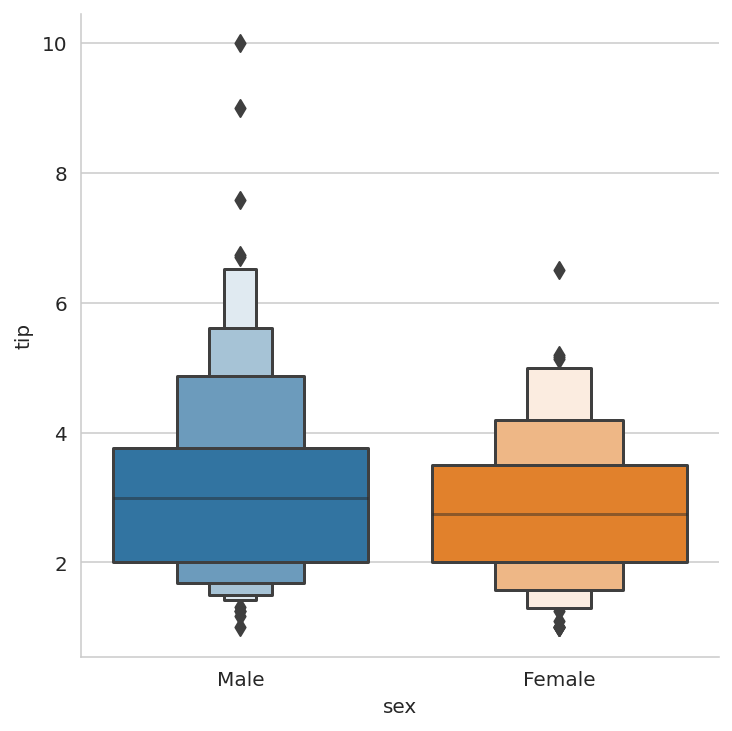

In [50]:
sns.catplot(x="sex", y="tip", kind='boxen', data=tips) # Boxenplot

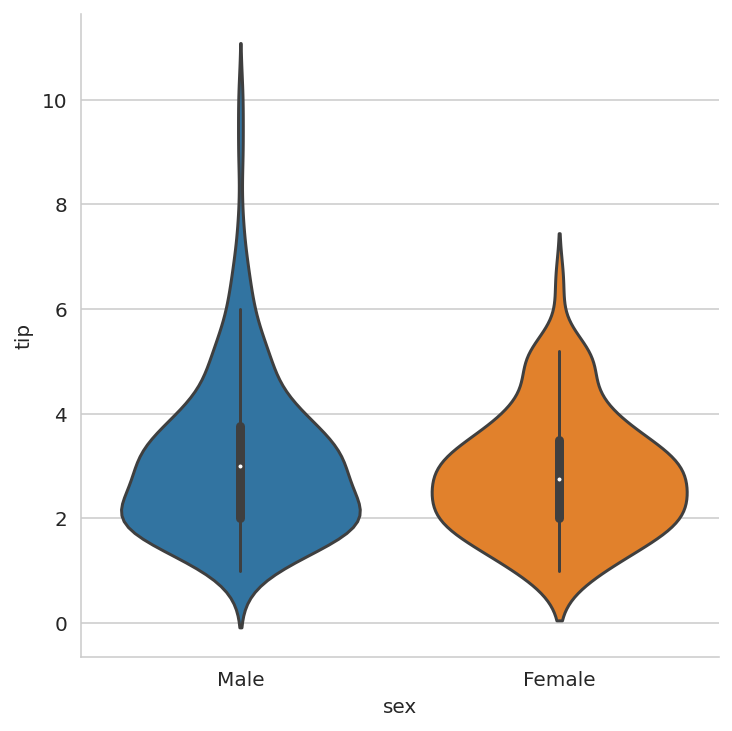

In [51]:
sns.catplot(x="sex", y="tip", kind='violin', data=tips) # Violinplot

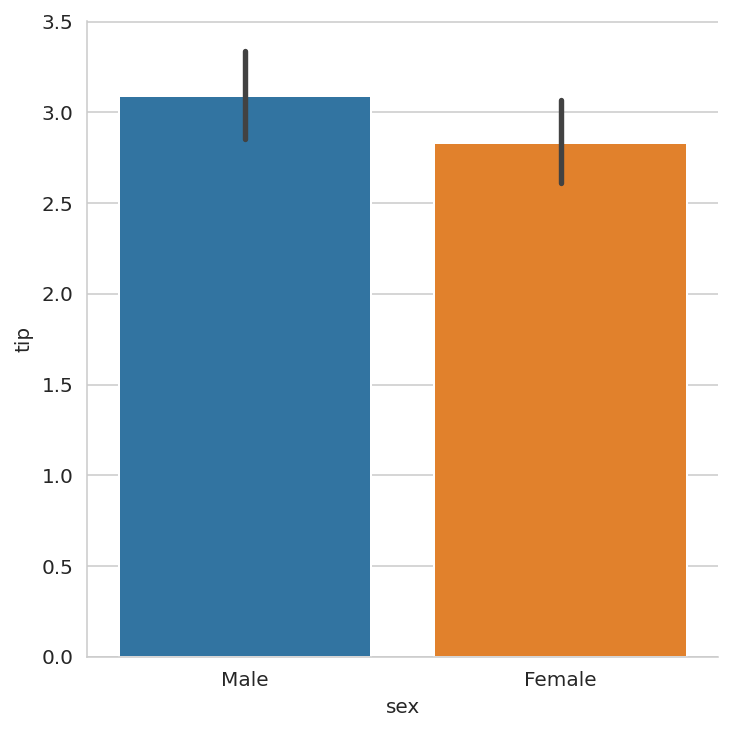

In [46]:
sns.catplot(x="sex", y="tip", kind='bar', data=tips);

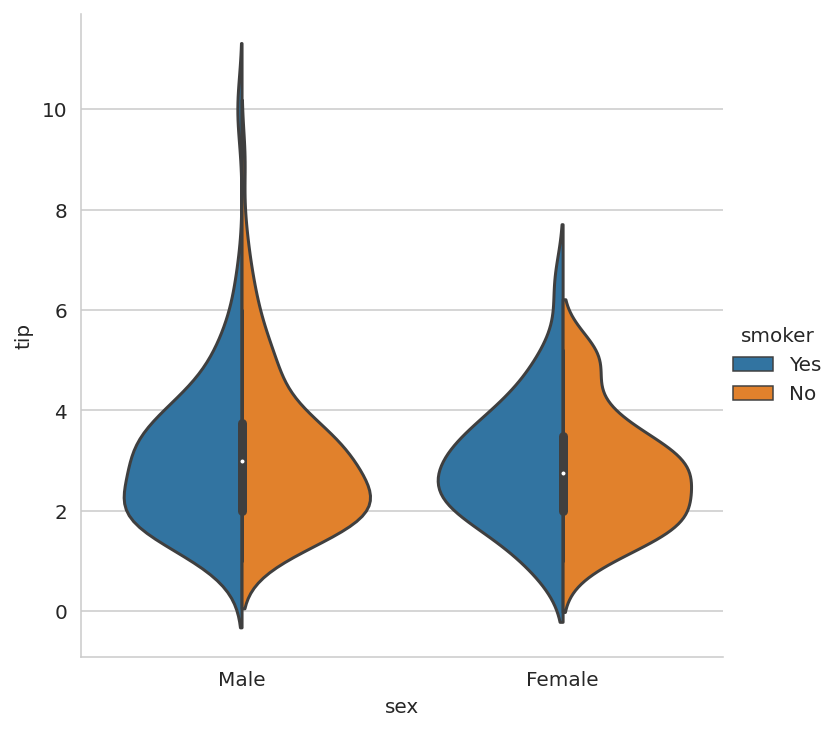

In [52]:
sns.catplot(x="sex", y="tip", kind='violin', hue='smoker', split=True, data=tips)

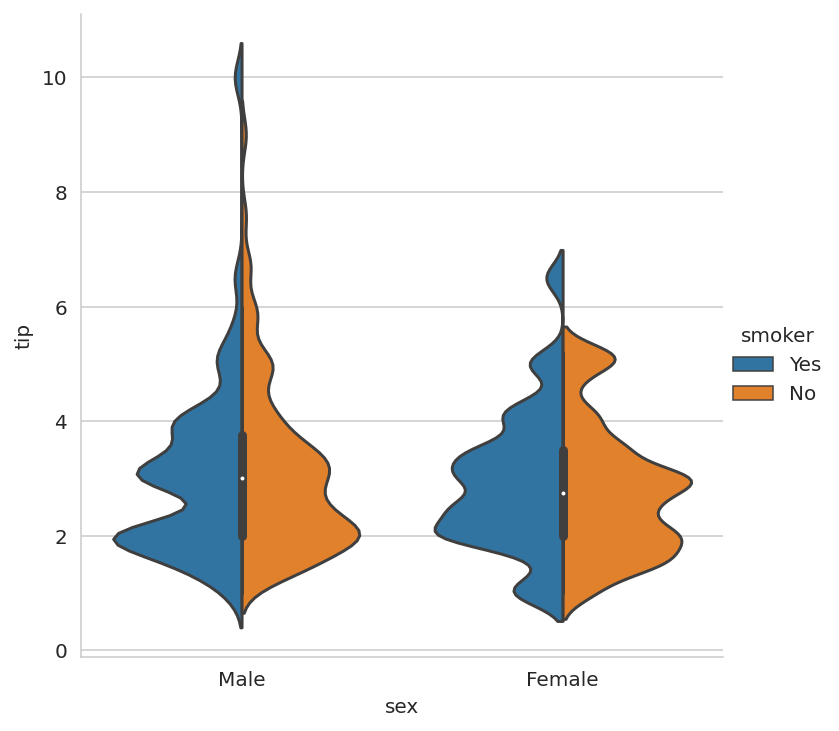

In [53]:
sns.catplot(x="sex", y="tip", kind='violin', hue='smoker', split=True, bw=0.2, data=tips)

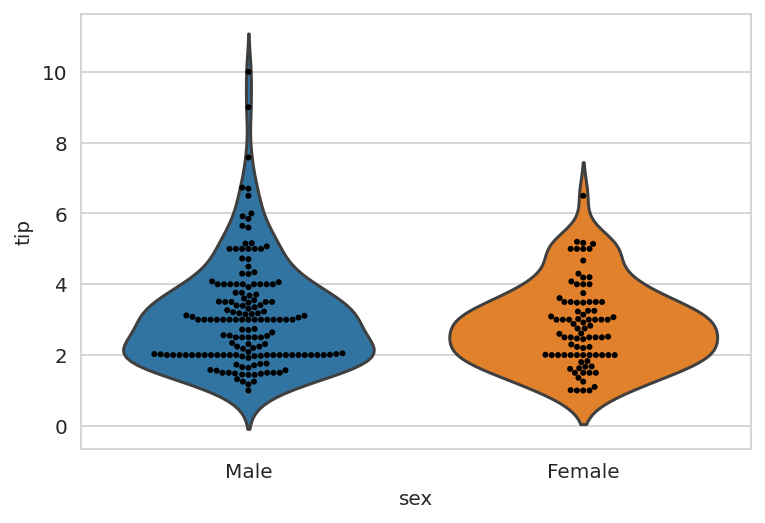

In [54]:
sns.violinplot(x="sex", y="tip", inner=None, data=tips);
sns.swarmplot(x="sex", y="tip", color='k', data=tips, size=3)
plt.savefig('test.png', dpi=150)

(100,)


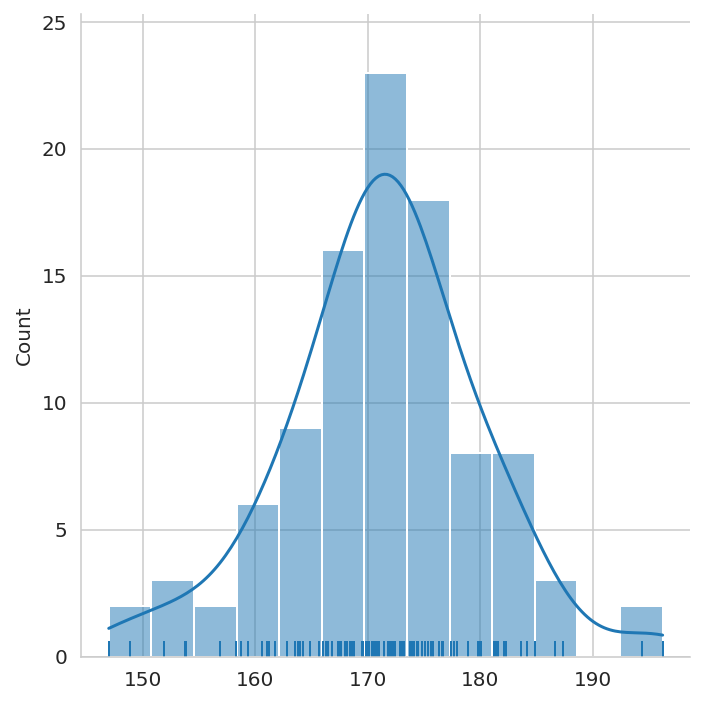

In [55]:
norm = np.random.normal(loc=170, scale=10, size=100)
print(norm.shape)
sns.displot(norm, rug=True, kde=True)
plt.savefig('temp.png', dpi=150)

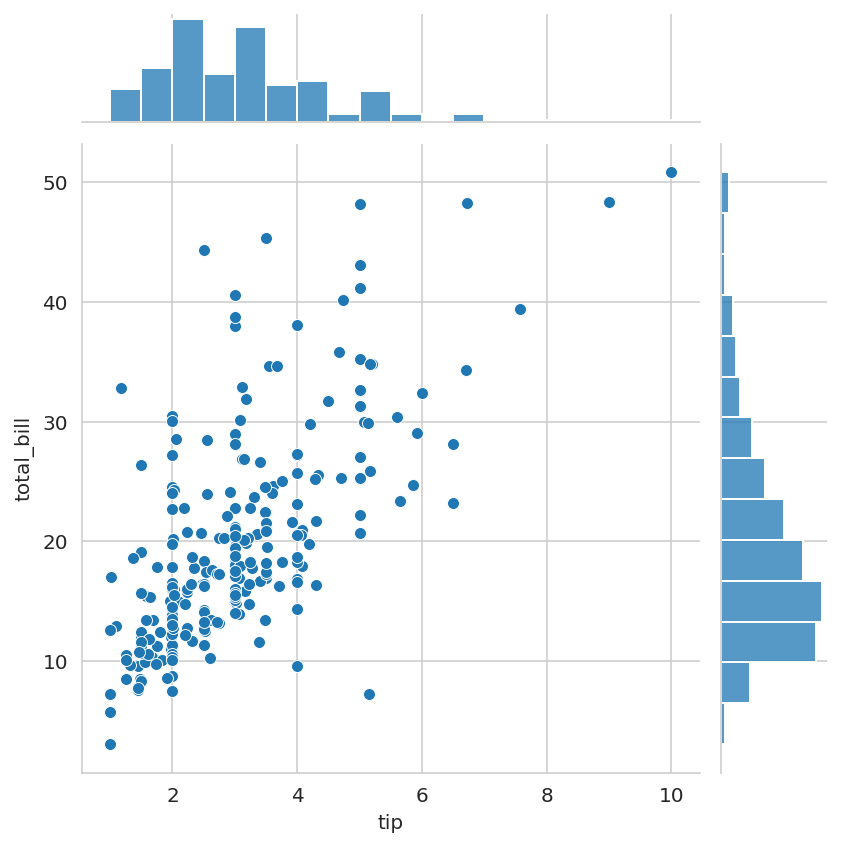

In [56]:
tips = sns.load_dataset('tips')
sns.jointplot(data=tips, x='tip', y='total_bill') # Joinplot
plt.savefig('temp.png', dpi=150)

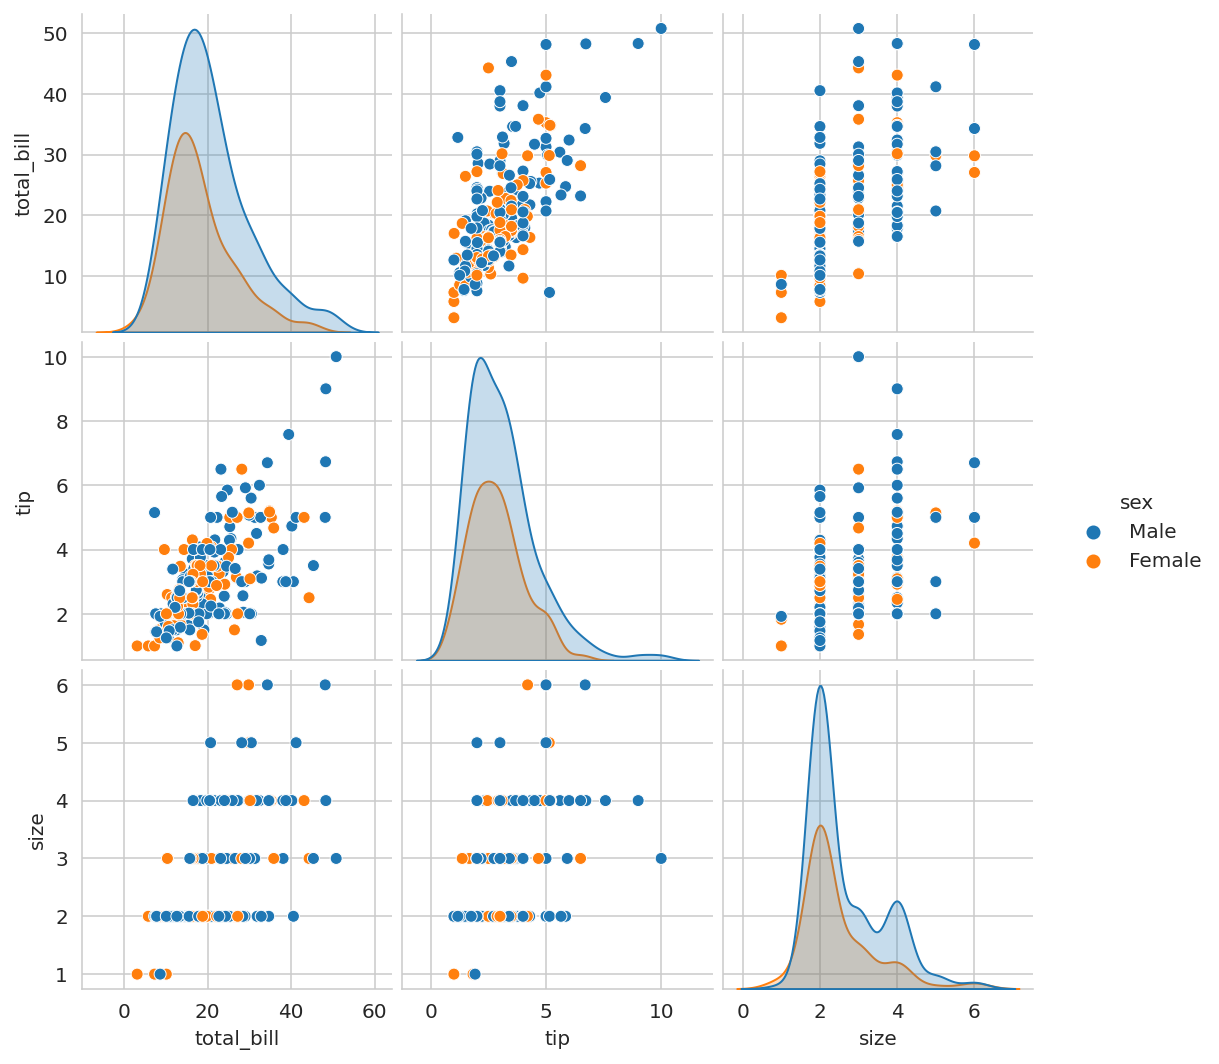

In [57]:
tips = sns.load_dataset('tips')
sns.pairplot(tips, hue='sex') # pairplot
plt.savefig('temp.png', dpi=150)

lmplot: https://fr.wikipedia.org/wiki/Quartet_d'Anscombe

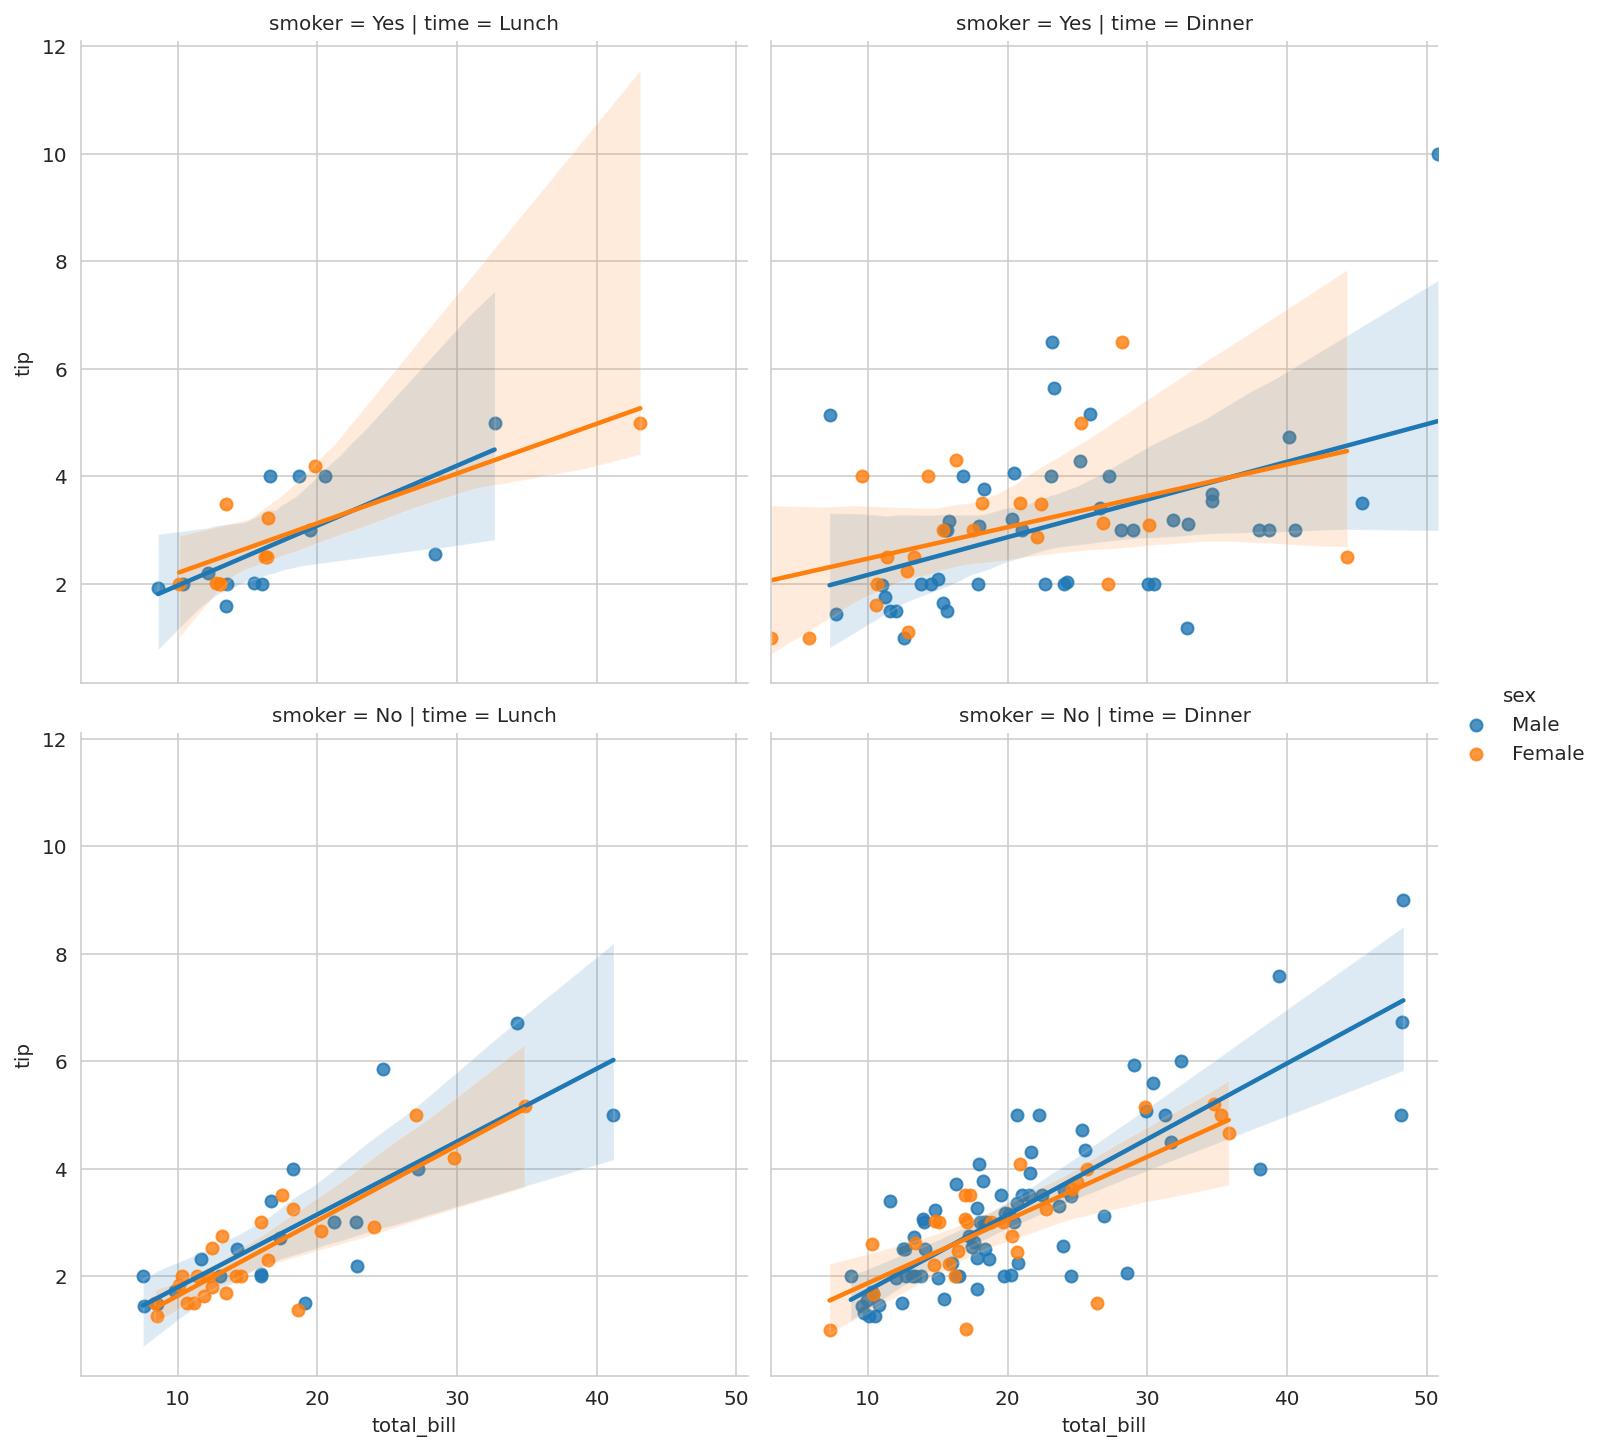

In [58]:
import seaborn as sns
tips = sns.load_dataset('tips')
sns.lmplot(x="total_bill", y="tip", col="time",hue="sex", row="smoker",ci=99,data=tips);
plt.savefig('test.png', dpi=150)

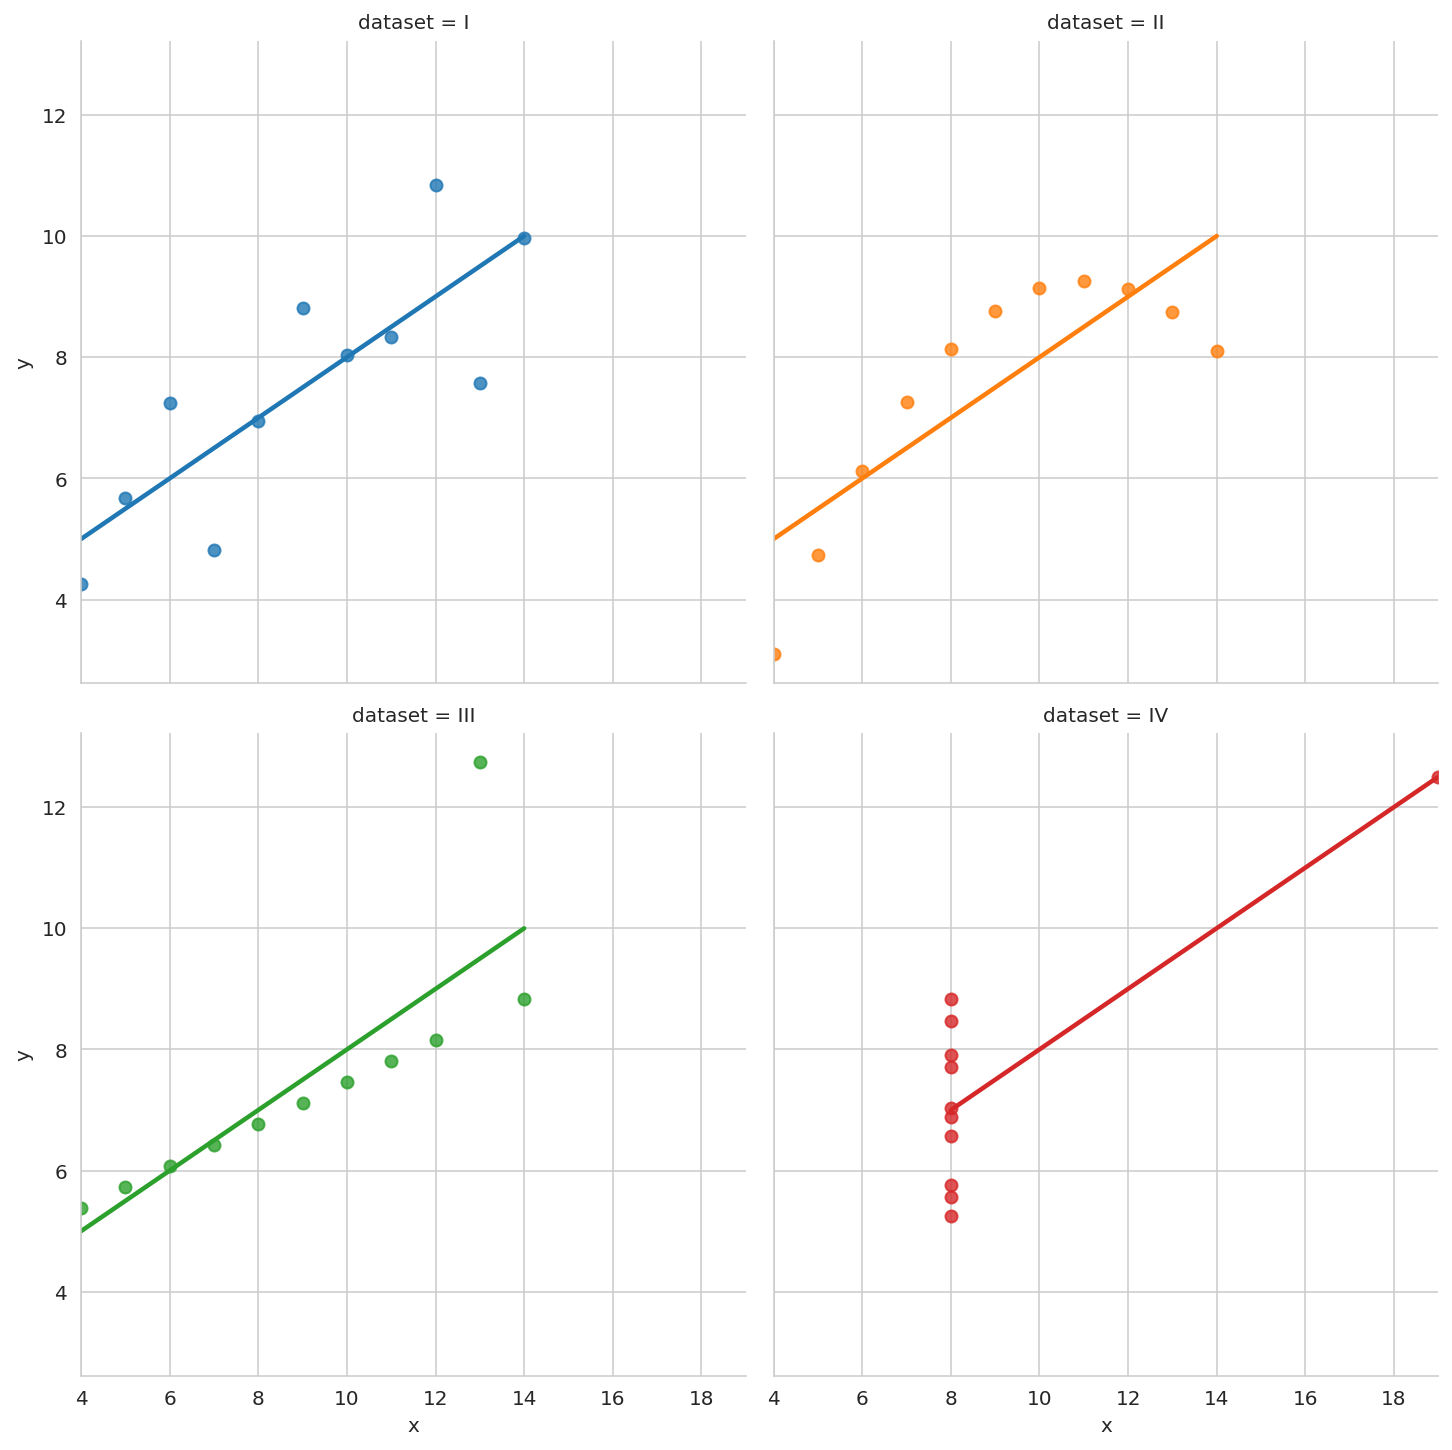

In [60]:
# Load the example dataset for Anscombe's quartet
df = sns.load_dataset("anscombe")
# Linear regression within each dataset
sns.lmplot(x="x", y="y", col="dataset", hue="dataset", data=df, col_wrap=2, ci=None)
plt.savefig('test.png', dpi=150)

Issues:
    - https://github.com/mwaskom/seaborn/issues/1641
    - https://github.com/matplotlib/matplotlib/issues/7413

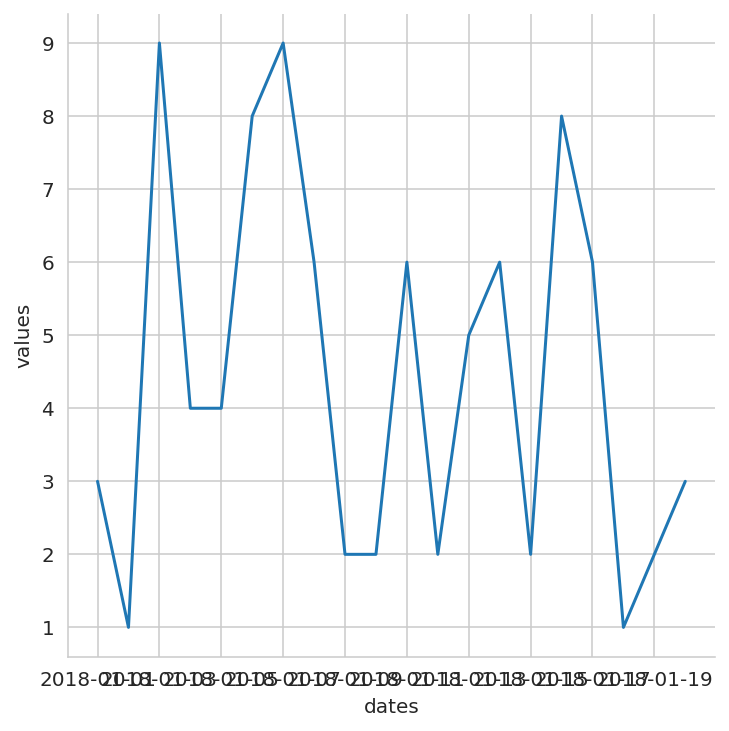

In [61]:
s = pd.DataFrame({'dates': pd.date_range('2018-01-01', periods=20),'values':np.random.randint(10, size=20)})
ax = sns.relplot(data=s, x='dates', y='values', kind='line')

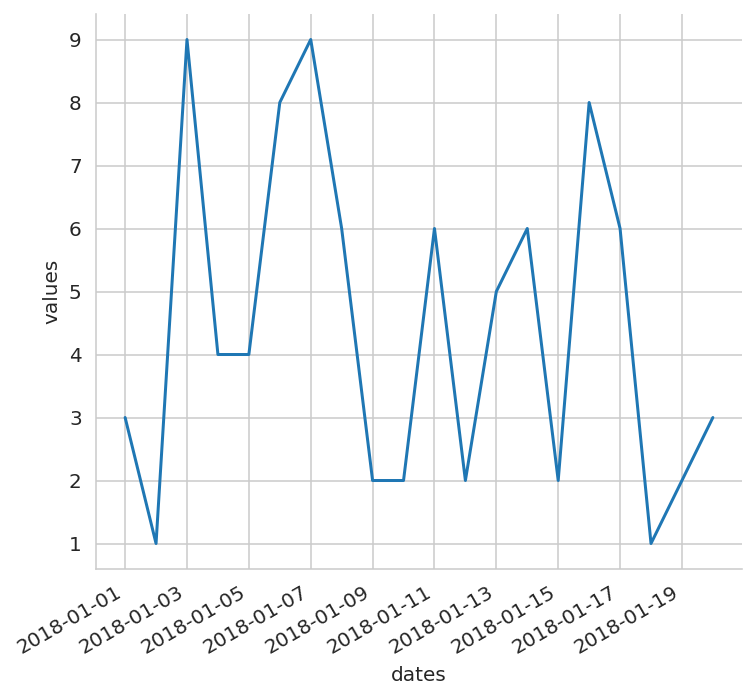

In [63]:
sns.relplot(data=s,x='dates',y='values',kind='line')
fig = plt.gcf()
fig.autofmt_xdate()

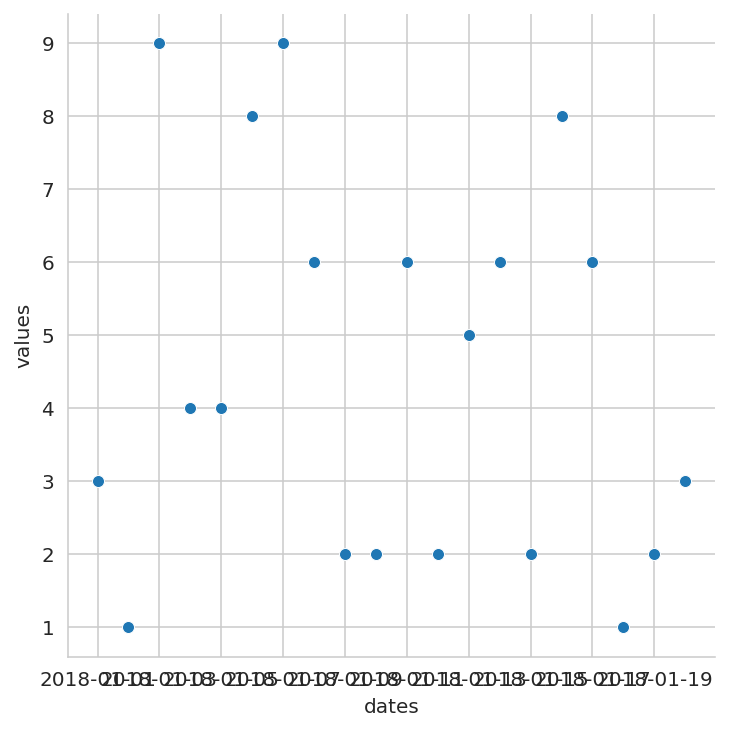

In [64]:
sns.relplot(data=s,x='dates',y='values')

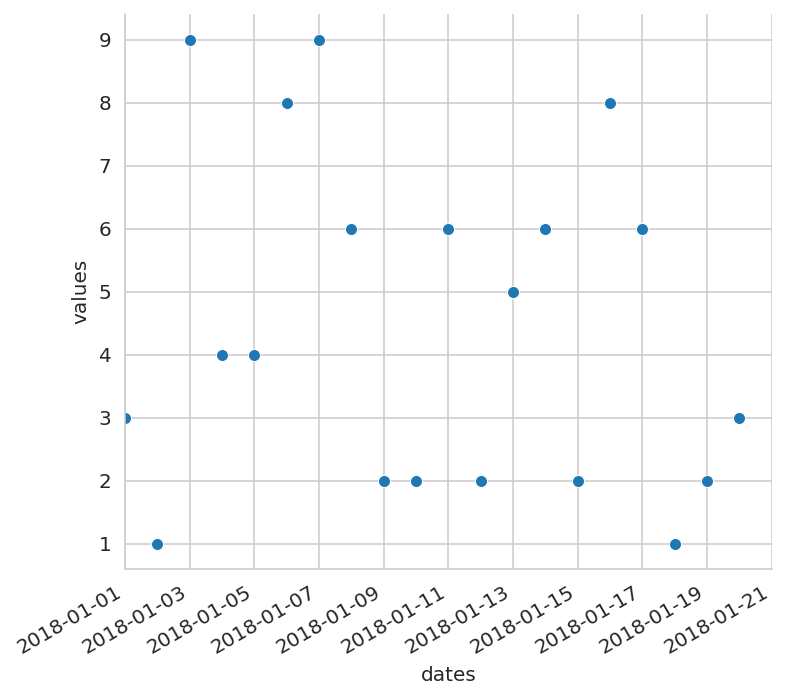

In [65]:
sns.relplot(data=s,x='dates',y='values')
fig = plt.gcf()
plt.xlim(np.datetime64('2018-01-01'), np.datetime64('2018-01-21'))
fig.autofmt_xdate()

Issue: https://github.com/mwaskom/seaborn/issues/1583

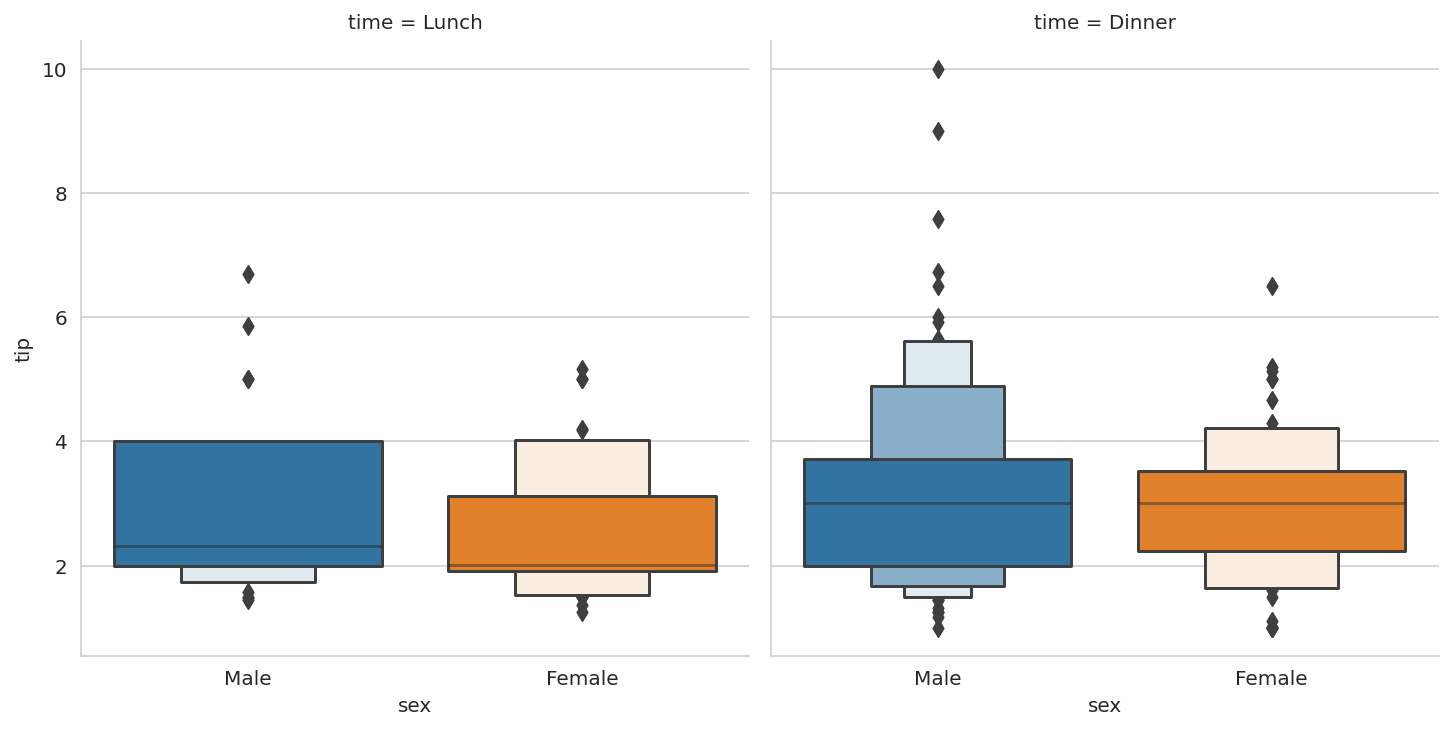

In [66]:
sns.catplot(x="sex", y="tip", kind='boxen', col='time', data=tips)

/usr/local/lib/python3.8/dist-packages/seaborn/categorical.py:3772: UserWarning: catplot is a figure-level function and does not accept target axes. You may wish to try boxenplot
  warnings.warn(msg, UserWarning)


/usr/local/lib/python3.8/dist-packages/seaborn/categorical.py:3772: UserWarning: catplot is a figure-level function and does not accept target axes. You may wish to try violinplot
  warnings.warn(msg, UserWarning)


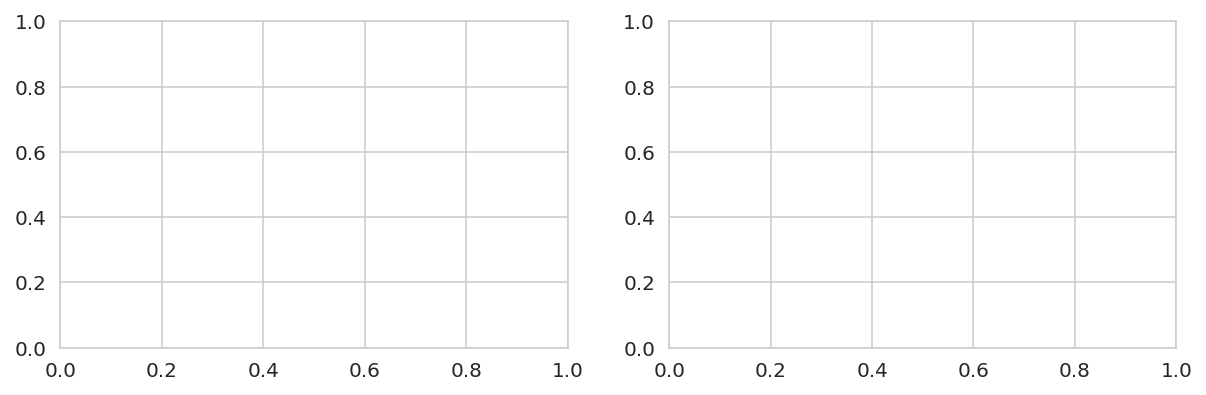

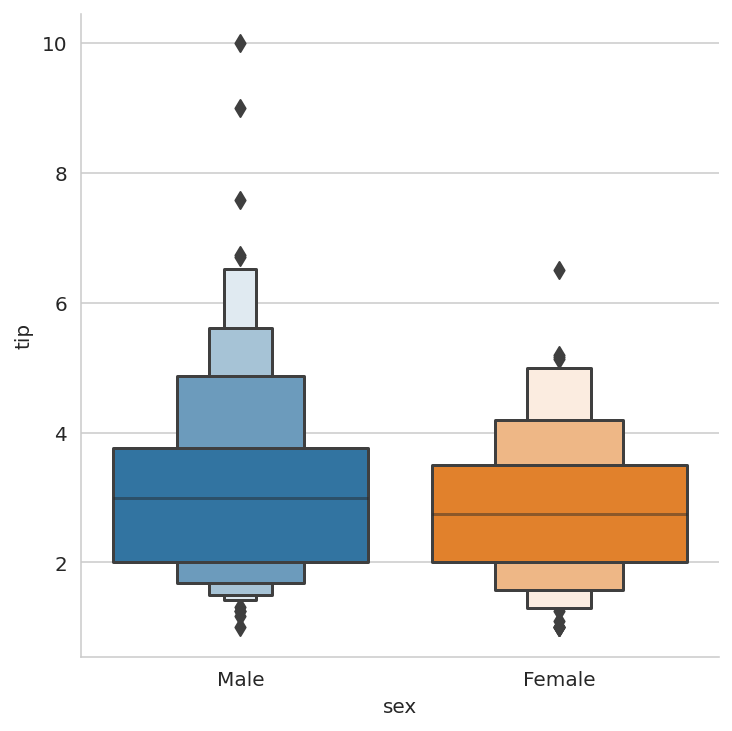

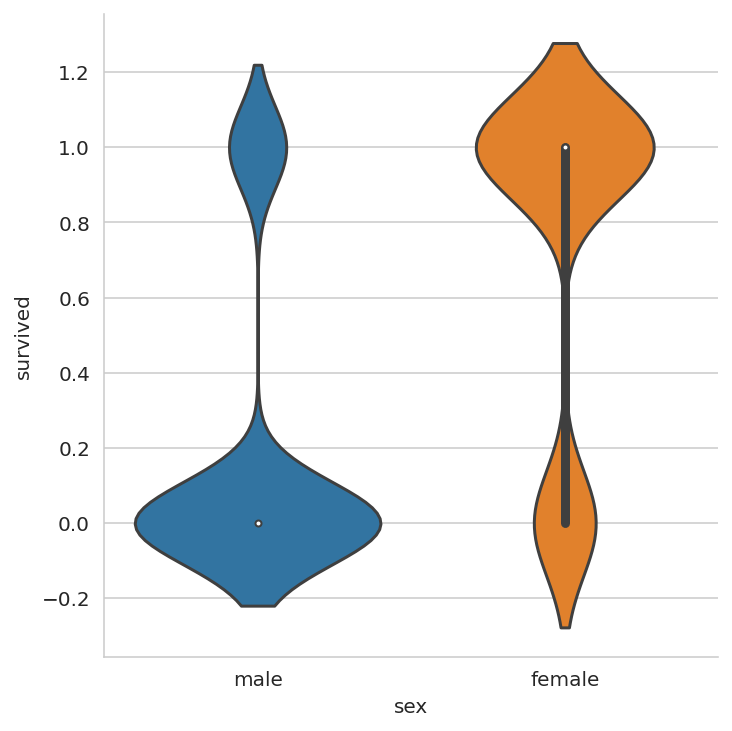

In [77]:
titanic = sns.load_dataset("titanic") # Bug
f, axes = plt.subplots(1, 2, figsize=(10, 3))
sns.catplot(x="sex", y="tip", kind='boxen', data=tips, ax=axes[0])
sns.catplot(x="sex", y="survived", kind='violin', data=titanic ,ax=axes[1])

<AxesSubplot:xlabel='sex', ylabel='survived'>

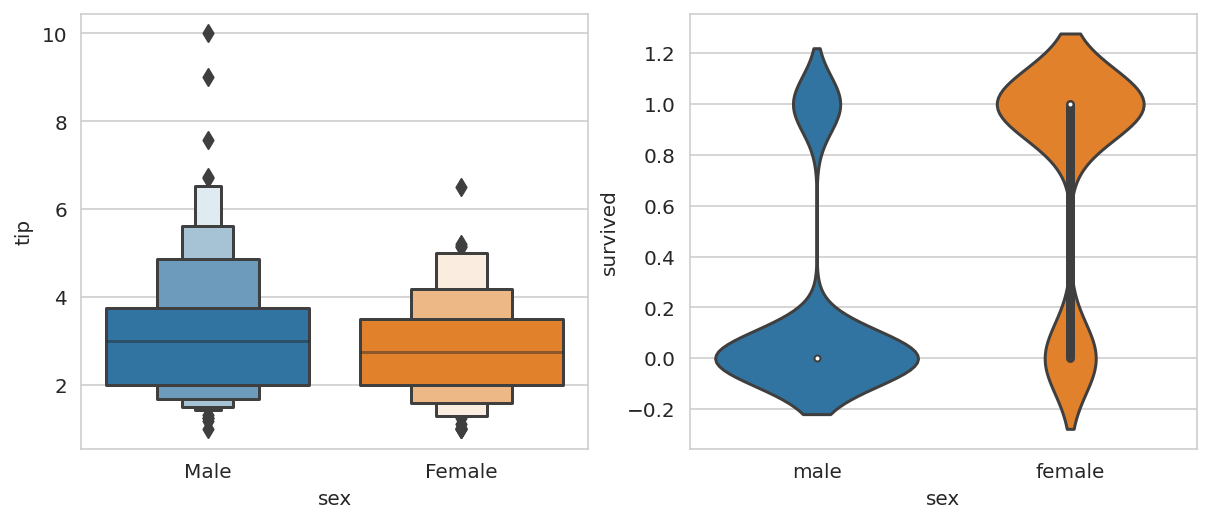

In [76]:
f, axes = plt.subplots(1, 2, figsize=(10, 4))
sns.boxenplot(x="sex", y="tip", data=tips, ax=axes[0]);
sns.violinplot(x="sex", y="survived", data=titanic, ax=axes[1])

### Matplotlib
#### Concept: 
 https://matplotlib.org/stable/tutorials/introductory/usage.html
#### Tutorial: 
 https://jakevdp.github.io/PythonDataScienceHandbook/04.00-introduction-to-matplotlib.html
#### Cheatsheet: 
 https://github.com/matplotlib/cheatsheets

In [79]:
import matplotlib.pyplot as plt

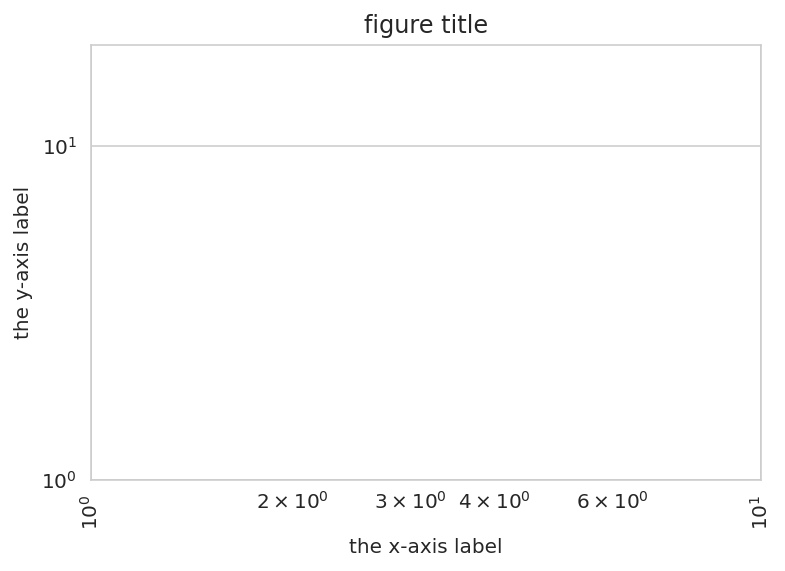

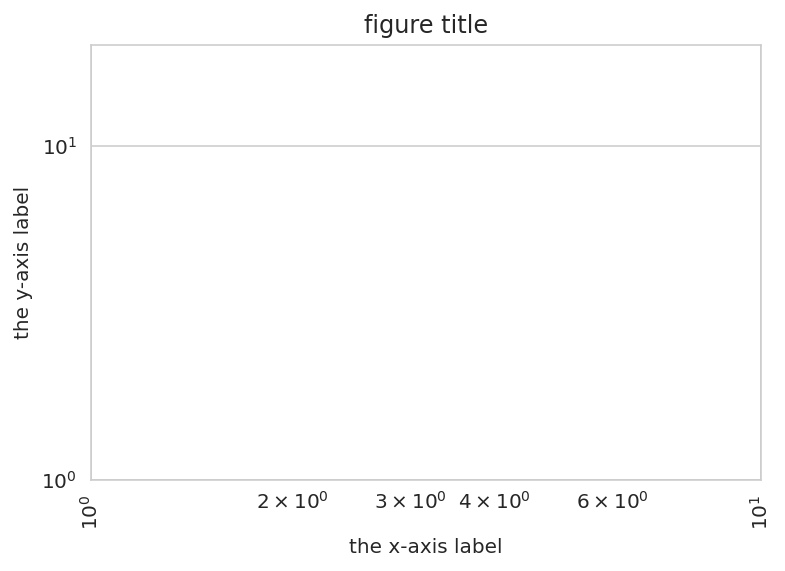

In [81]:
plt.xlabel('the x-axis label')
plt.ylabel('the y-axis label')
plt.title('figure title')
plt.xlim([1, 10]) # the x-axis bounds
plt.ylim([1, 20]) # the y-axis bounds
plt.xscale('log') # to have the x-axis in logscale
plt.yscale('log') # to have the y-axis in logscale
plt.xticks(rotation=90) # to rotate the x-axis ticks labels
plt.savefig('temp.png', dpi=150) # to save the fig
plt.gca() # get access to the current axes object
plt.gcf() # get access to the current figure object
# to see more: dir(plt)

### Ipywidgets
- https://ipywidgets.readthedocs.io/en/stable/examples/Widget%20List.html
- https://ipywidgets.readthedocs.io/en/stable/

In [83]:
import pandas as pd
import seaborn as sns
from ipywidgets import interact
import ipywidgets as widgets
tips = sns.load_dataset("tips")
# dropdown menu, int slider, float slider
@interact(sex=['Male', 'Female'], size=(1,5,1), total_bill=(1,50,0.5))
def show(sex, size, total_bill):
    sns.relplot(
        data=tips[
            (tips.loc[:, "sex"] == sex)
            & (tips.loc[:, "size"] < size)
            & (tips.loc[:, "total_bill"] < total_bill)],
        x="tip",
        y="total_bill",
        hue='sex'
    )

interactive(children=(Dropdown(description='sex', options=('Male', 'Female'), value='Male'), IntSlider(value=3…

In [84]:
# more options for the widgets by using the widgets contructors
@interact(
    size=widgets.IntSlider(min=1, max=5, step=1, value=5),
    total_bill=widgets.FloatSlider(min=1, max=50, step=0.5, value=50)
)
def show(size, total_bill):
    sns.relplot(
        data=tips[
            (tips.loc[:, "size"] < size) & (tips.loc[:, "total_bill"] < total_bill)
        ],
        x="tip",
        y="total_bill",
        hue="sex",
    )

interactive(children=(IntSlider(value=5, description='size', max=5, min=1), FloatSlider(value=50.0, descriptio…

### Dashboard
#### Voila
- https://voila.readthedocs.io/en/stable/
- https://blog.jupyter.org/and-voil%C3%A0-f6a2c08a4a93
    
        $ voila my_notebook.ipynb
#### Plotly Dash
- https://plotly.com/dash/
- https://dash-gallery.plotly.host/Portal/
#### Voila deployment
- https://voila.readthedocs.io/en/stable/deploy.html
#### Altair
- https://altair-viz.github.io/getting_started/overview.html

In [86]:
import altair as alt
from vega_datasets import data
cars = data.cars()
alt.Chart(cars).mark_point().encode(
    x='Miles_per_Gallon',
    y='Horsepower',
    color='Origin')

alt.Chart(...)

Example:

            alt.Chart(cars)
            .mark_point()
            .mark_circle()
            .mark_square()
            .mark_line()
            .mark_area()
            .mark_bar()
            .mark_tick()
            .mark_*
            .encode(
                x=
                y=
                color=
                opacity=
                shape=
                size=
                row=
                column=
                )

# Basic Pandas operations
## Method Chaining
- https://tomaugspurger.github.io/method-chaining


In [129]:
import altair as alt
import seaborn as sns
from vega_datasets import data
import pandas as pd

cars = data.cars()
cars.head(3)

Name  Miles_per_Gallon  Cylinders  Displacement  \
0  chevrolet chevelle malibu              18.0          8         307.0   
1          buick skylark 320              15.0          8         350.0   
2         plymouth satellite              18.0          8         318.0   

   Horsepower  Weight_in_lbs  Acceleration       Year Origin  
0       130.0           3504          12.0 1970-01-01    USA  
1       165.0           3693          11.5 1970-01-01    USA  
2       150.0           3436          11.0 1970-01-01    USA

In [130]:
def get_brand_and_model_name(df):
    df = df.copy()
    df['brand'] = df['Name'].str.split().str[0]
    df['model'] = df['Name'].str.split(n=1).str[1]
    df = df.drop(columns=['Name'])
    return df
cars = (cars.pipe(get_brand_and_model_name)
        .assign(liter_per_100km=lambda d:235.215/d.loc[:,'Miles_per_Gallon'])
        .drop(columns=['Miles_per_Gallon'])
        .rename(columns=lambda x: x.lower()))
cars.head(3)

cylinders  displacement  horsepower  weight_in_lbs  acceleration  \
0          8         307.0       130.0           3504          12.0   
1          8         350.0       165.0           3693          11.5   
2          8         318.0       150.0           3436          11.0   

        year origin      brand            model  liter_per_100km  
0 1970-01-01    USA  chevrolet  chevelle malibu          13.0675  
1 1970-01-01    USA      buick      skylark 320          15.6810  
2 1970-01-01    USA   plymouth        satellite          13.0675

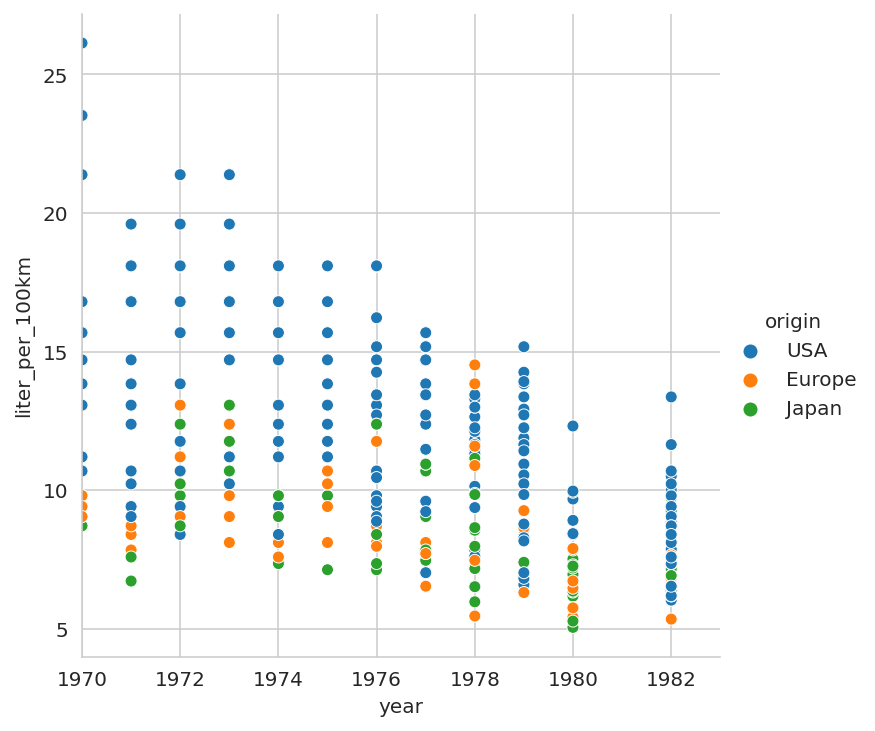

In [88]:
# seaborn style
sns.relplot(data=cars, x='year', y='liter_per_100km', hue='origin')
fig = plt.gcf()
plt.xlim(pd.Timestamp('1970'), pd.Timestamp('1983'))
plt.savefig('car.png')
plt.show()

In [89]:
# altair style
alt.Chart(cars).mark_point().encode(
    x = 'year',
    y = 'liter_per_100km',
    color = 'origin',
    tooltip = ('brand', 'model'))

alt.Chart(...)

In [90]:
import seaborn as sns
tips = sns.load_dataset('tips')
tips.head()
tips = (tips
        .groupby('sex')[['total_bill', 'tip']]
        .mean()
        .assign(percent_tip=lambda df: df['tip']/df['total_bill']*100)
        .drop(columns=['total_bill', 'tip']))
print(tips)

        percent_tip
sex                
Male      14.893976
Female    15.691779


In [91]:
import seaborn as sns
tips = sns.load_dataset('tips')
# we add a column week_end that is True if 'day' is a weekend day
tips = tips.assign(week_end=lambda df: df.loc[:,'day'].isin(['Sun','Sat']))
tips.tail()

total_bill   tip     sex smoker   day    time  size  week_end
239       29.03  5.92    Male     No   Sat  Dinner     3      True
240       27.18  2.00  Female    Yes   Sat  Dinner     2      True
241       22.67  2.00    Male    Yes   Sat  Dinner     2      True
242       17.82  1.75    Male     No   Sat  Dinner     2      True
243       18.78  3.00  Female     No  Thur  Dinner     2     False

In-place operation: not always faster with DataFrames

In [93]:
np.random.seed(0)
df = pd.DataFrame(np.random.randint(1, 10, (3,3)),columns=list('abc'))
df

a  b  c
0  6  1  4
1  4  8  4
2  6  3  5

In [94]:
def f(col):
    if col[0]>3:
        return col.sum()
    else:
        return -1
df.apply(f)

a    16
b    -1
c    13
dtype: int64

In [95]:
np.random.seed(0)
df = pd.DataFrame(np.random.randint(1, 10, (3,3)),columns=list('abc'))
df

a  b  c
0  6  1  4
1  4  8  4
2  6  3  5

In [96]:
def f(e):
    if e < 5:
        return -1
    else:
        return e**2
df.applymap(f)

a   b   c
0  36  -1  -1
1  -1  64  -1
2  36  -1  25

In [97]:
np.random.seed(0)
df = pd.DataFrame(np.random.randint(1, 10, (3,3)),columns=list('abc'))
df

a  b  c
0  6  1  4
1  4  8  4
2  6  3  5

In [98]:
df.agg(np.mean)

a    5.333333
b    4.000000
c    4.333333
dtype: float64

In [99]:
df.agg([np.mean, np.std, pd.Series.sem])

a         b         c
mean  5.333333  4.000000  4.333333
std   1.154701  3.605551  0.577350
sem   0.666667  2.081666  0.333333

In [100]:
df.agg({'a':np.mean, 'b':[np.std, pd.Series.sem]})

a         b
mean  5.333333       NaN
std        NaN  3.605551
sem        NaN  2.081666

In [105]:
df = pd.DataFrame({
        'col1' : ['A', 'A', 'B', np.nan, 'D', 'C'],
        'col2' : [2, 1, 9, 8, 7, 4],
        'col3': [0, 1, 9, 4, 2, 3],})
df

col1  col2  col3
0    A     2     0
1    A     1     1
2    B     9     9
3  NaN     8     4
4    D     7     2
5    C     4     3

In [107]:
df.sort_values(by='col2', ascending=False)

col1  col2  col3
2    B     9     9
3  NaN     8     4
4    D     7     2
5    C     4     3
0    A     2     0
1    A     1     1

In [108]:
df.sort_values(by=['col1', 'col2'])

col1  col2  col3
1    A     1     1
0    A     2     0
2    B     9     9
5    C     4     3
4    D     7     2
3  NaN     8     4

In [109]:
df = pd.DataFrame({
        'col1' : ['A', 'A', 'B', np.nan, 'D', 'C'],
        'col2' : [2, 1, 9, 8, 7, 4],
        'col3': [0, 1, 9, 4, 2, 3],})
df

col1  col2  col3
0    A     2     0
1    A     1     1
2    B     9     9
3  NaN     8     4
4    D     7     2
5    C     4     3

In [110]:
s = 'stra strb strc'
s.split()

['stra', 'strb', 'strc']

In [124]:
s = pd.Series(['stra strb strc'])
print(f"Marque : {s.str.split(n=1).str[0]}\nModèle : {s.str.split(n=1).str[1]}")

Marque : 0    stra
dtype: object
Modèle : 0    strb strc
dtype: object


In [132]:
p = pd.DataFrame(np.random.randint(1, 10, 9).reshape(3,3), columns=list('abc'))
p

a  b  c
0  2  6  9
1  5  4  1
2  4  6  1

In [133]:
np.log(p)

a         b         c
0  0.693147  1.791759  2.197225
1  1.609438  1.386294  0.000000
2  1.386294  1.791759  0.000000

In [138]:
s1 = pd.Series([10, 20, 30], index=list('abc'))
print(s1)
s2 = pd.Series([1, 2, 3], index=list('acd'))
print(s2)
s1+s2 # auto alignment, calls s1.add(s2), this is a pandas ufuncs

a    10
b    20
c    30
dtype: int64
a    1
c    2
d    3
dtype: int64


a    11.0
b     NaN
c    32.0
d     NaN
dtype: float64

In [140]:
np.add(s1,s2)

a    11.0
b     NaN
c    32.0
d     NaN
dtype: float64

In [141]:
s1.add(s2, fill_value=0)

a    11.0
b    20.0
c    32.0
d     3.0
dtype: float64

In [144]:
s1_aligned, s2_aligned = s1.align(s2)
print(s1_aligned, s2_aligned, sep='\n\n')

a    10.0
b    20.0
c    30.0
d     NaN
dtype: float64

a    1.0
b    NaN
c    2.0
d    3.0
dtype: float64


In [145]:
names = ['alice', 'bob', 'charle']

In [146]:
bananas = pd.Series([10, 3, 9], index=names)
oranges = pd.Series([3, 11, 6], index=names)
fruits_jan = pd.DataFrame({'bananas':bananas, 'orange':oranges})

In [147]:
bananas = pd.Series([6, 1], index=names[:-1])
apples = pd.Series([8, 5], index=names[1:])
fruits_feb = pd.DataFrame({'bananas':bananas, 'apples':apples})

In [148]:
fruits_jan

bananas  orange
alice        10       3
bob           3      11
charle        9       6

In [149]:
fruits_feb

bananas  apples
alice       6.0     NaN
bob         1.0     8.0
charle      NaN     5.0

In [150]:
fruits_jan_aligned, fruits_feb_aligned = fruits_jan.align(fruits_feb)

In [151]:
print(fruits_jan_aligned, fruits_feb_aligned, sep='\n\n')

        apples  bananas  orange
alice      NaN       10       3
bob        NaN        3      11
charle     NaN        9       6

        apples  bananas  orange
alice      NaN      6.0     NaN
bob        8.0      1.0     NaN
charle     5.0      NaN     NaN


In [152]:
eaten_fruits = fruits_jan + fruits_feb
eaten_fruits

apples  bananas  orange
alice      NaN     16.0     NaN
bob        NaN      4.0     NaN
charle     NaN      NaN     NaN

In [156]:
eaten_fruits = fruits_jan.add(fruits_feb, fill_value=0)
eaten_fruits

apples  bananas  orange
alice      NaN     16.0     3.0
bob        8.0      4.0    11.0
charle     5.0      9.0     6.0

In [157]:
np.add(fruits_jan, fruits_feb)

<ipython-input-157-9e71332b9d6f>:1: FutureWarning: Calling a ufunc on non-aligned DataFrames (or DataFrame/Series combination). Currently, the indices are ignored and the result takes the index/columns of the first DataFrame. In the future , the DataFrames/Series will be aligned before applying the ufunc.
Convert one of the arguments to a NumPy array (eg 'ufunc(df1, np.asarray(df2)') to keep the current behaviour, or align manually (eg 'df1, df2 = df1.align(df2)') before passing to the ufunc to obtain the future behaviour and silence this warning.
  np.add(fruits_jan, fruits_feb)


bananas  orange
alice      16.0     NaN
bob         4.0    19.0
charle      NaN    11.0

In [158]:
np.add(fruits_jan, fruits_feb.to_numpy())

bananas  orange
alice      16.0     NaN
bob         4.0    19.0
charle      NaN    11.0

Explicitly align: https://pandas.pydata.org/docs/whatsnew/v1.2.1.html#calling-numpy-ufuncs-on-non-aligned-dataframes

In [159]:
p = pd.DataFrame(np.random.randint(1, 10, size=(3,3)),columns=list('abc'), index=list('xyz'))
p

a  b  c
x  3  4  9
y  2  4  4
z  4  8  1

In [162]:
s_row = pd.Series([10, 10, 10], index=list('abc'))
print(s_row)
s_col = pd.Series([100, 100, 100], index=list('xyz'))
print(s_col)

a    10
b    10
c    10
dtype: int64
x    100
y    100
z    100
dtype: int64


In [163]:
p + s_row

a   b   c
x  13  14  19
y  12  14  14
z  14  18  11

In [164]:
p - s_col

a   b   c   x   y   z
x NaN NaN NaN NaN NaN NaN
y NaN NaN NaN NaN NaN NaN
z NaN NaN NaN NaN NaN NaN

In [167]:
p.add(s_col, axis=0)

a    b    c
x  103  104  109
y  102  104  104
z  104  108  101

Dtype extension: https://pandas.pydata.org/docs/user_guide/basics.html#basics-dtypes

Pandas type NA: https://pandas.pydata.org/docs/user_guide/missing_data.html#missing-data-na

Integer NA: https://pandas.pydata.org/pandas-docs/stable/user_guide/integer_na.html

Pandas boolean: https://pandas.pydata.org/pandas-docs/stable/user_guide/boolean.html

Pandas text: https://pandas.pydata.org/pandas-docs/stable/user_guide/text.html

In [168]:
# there are differences between pd.NA and np.nan
print(pd.NA > pd.NA)
print(np.nan > np.nan)

<NA>
False


In [169]:
pd.Series([1, 2, np.nan, pd.NA, None], dtype='UInt8')

0       1
1       2
2    <NA>
3    <NA>
4    <NA>
dtype: UInt8

In [171]:
pd.Series([1, 2, np.nan, pd.NA, None], dtype='Float32')

0     1.0
1     2.0
2    <NA>
3    <NA>
4    <NA>
dtype: Float32

In [172]:
pd.Series(['a', 'b', np.nan, pd.NA, None], dtype='string')

0       a
1       b
2    <NA>
3    <NA>
4    <NA>
dtype: string

In [174]:
s = pd.Series(['a', 'b', None])
s

0       a
1       b
2    None
dtype: object

In [175]:
s.convert_dtypes()

0       a
1       b
2    <NA>
dtype: string